## **Dataset Description**

In [0]:
import pandas as pd

file_path = "/Volumes/workspace/default/professor_example/marketing_campaign.csv"

df1 = pd.read_csv(file_path, sep='\t')

print(df1.head())

     ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation  ...             3         11         1
1  2174        1954  Graduation  ...             3         11         0
2  4141        1965  Graduation  ...             3         11         0
3  6182        1984  Graduation  ...             3         11         0
4  5324        1981         PhD  ...             3         11         0

[5 rows x 29 columns]


In [0]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Preprocessing Data**

## **Data Cleaning**

In [0]:
#Convert Dt_Customer to datetime
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], format='%d-%m-%Y')


In [0]:
# Check for missing values
print("Missing values:")
print(df1.isnull().sum())

# Dropping missing values in Income
df1 = df1.dropna(subset=['Income'])


Missing values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [0]:
# Check for duplicates
print(f"\nDuplicate rows: {df1.duplicated().sum()}")


Duplicate rows: 0


In [0]:
# Name constant columns (by looking at the data, the constant columns are Z_CostContact, Z_Revenue) 
constant_cols = [col for col in df1.columns if df1[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

# Remove constant columns
df1 = df1.drop(columns=constant_cols)


Constant columns: ['Z_CostContact', 'Z_Revenue']


## **Recoding Categorical Variables**

In [0]:
# Clean categorical variables
print("\nUnique values in categorical columns:")
print(f"Education: {df1['Education'].unique()}")
print(f"Marital_Status: {df1['Marital_Status'].unique()}")

# Clean education levels
df1['Education'] = df1['Education'].replace({
    '2n Cycle': 'Master',
    'Basic': 'Undergraduate'
})

# Clean marital status
df1['Marital_Status'] = df1['Marital_Status'].replace({
    'Together': 'Partner',
    'Married': 'Partner',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})


Unique values in categorical columns:
Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


## **Handling Outliers**

In [0]:
df1.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

key_cols = [
    'Income', 
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds',
    'Recency',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]

for column in key_cols:
    if df1[column].dtype == 'float64' or df1[column].dtype == 'int64':
        Q1 = np.percentile(df1[column], 25)
        Q3 = np.percentile(df1[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        outliers_iqr = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
        print(f"Outliers in {column}: {outliers_iqr.shape[0]}")

# Function to identify outliers using the IQR method
def flag_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)


outlier_df = df1.copy()

outlier_df['Is_Outlier'] = False
for col in key_cols:
    outlier_df['Is_Outlier'] = outlier_df['Is_Outlier'] | flag_outliers(outlier_df, col)

# Compare the outlier group vs. the non-outlier group
outlier_group = outlier_df[outlier_df['Is_Outlier'] == True]
non_outlier_group = outlier_df[outlier_df['Is_Outlier'] == False]

print(f"Total customers: {len(df1)}")
print(f"Number of outlier customers: {len(outlier_group)}")
print(f"Percentage of outlier customers: {(len(outlier_group)/len(df1))*100:.2f}%")


Outliers in Income: 8
Outliers in MntWines: 35
Outliers in MntFruits: 246
Outliers in MntMeatProducts: 174
Outliers in MntFishProducts: 222
Outliers in MntSweetProducts: 246
Outliers in MntGoldProds: 205
Outliers in Recency: 0
Outliers in NumWebPurchases: 3
Outliers in NumCatalogPurchases: 23
Outliers in NumStorePurchases: 0
Outliers in NumWebVisitsMonth: 8
Total customers: 2216
Number of outlier customers: 648
Percentage of outlier customers: 29.24%


In [0]:

print("\n--- Maximum Values in Outlier Group ---")
print(outlier_group[key_cols].max())

# Rows with the absolute highest income or spending
print("\n--- Top 5 Customers by Income ---")
print(outlier_group.nlargest(5, 'Income')[['Income', 'MntWines', 'MntMeatProducts', 'Education', 'Marital_Status']])


--- Maximum Values in Outlier Group ---
Income                 666666.0
MntWines                 1493.0
MntFruits                 199.0
MntMeatProducts          1725.0
MntFishProducts           259.0
MntSweetProducts          262.0
MntGoldProds              321.0
Recency                    99.0
NumWebPurchases            27.0
NumCatalogPurchases        28.0
NumStorePurchases          13.0
NumWebVisitsMonth          20.0
dtype: float64

--- Top 5 Customers by Income ---
        Income  MntWines  MntMeatProducts   Education Marital_Status
2233  666666.0         9               18  Graduation        Partner
617   162397.0        85               16         PhD        Partner
687   160803.0        55             1622         PhD        Partner
1300  157733.0        39                9      Master        Partner
164   157243.0        20             1582         PhD        Partner


In [0]:
# Find the customer(s) with the implausible income
implausible_income = df1[df1['Income'] == 666666]
print(implausible_income)

        ID  Year_Birth   Education  ... AcceptedCmp2  Complain  Response
2233  9432        1977  Graduation  ...            0         0         0

[1 rows x 27 columns]


In [0]:
display(implausible_income)

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
9432,1977,Graduation,Partner,666666.0,1,0,2013-06-02T00:00:00.000Z,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0


In [0]:
#Remove the outlier
df1 = df1[df1['Income'] != 666666]

In [0]:
# Compare the means of key metrics between the two groups
comparison = pd.DataFrame({
    'Non-Outlier Mean': non_outlier_group[key_cols].mean(),
    'Outlier Mean': outlier_group[key_cols].mean(),
})
print("\n--- Comparison of Means ---")
print(comparison)

# Compare categorical variables
print("\n--- Education Level (%) ---")
print(outlier_group['Education'].value_counts(normalize=True) * 100)
print("\n--- vs. Non-Outlier Group ---")
print(non_outlier_group['Education'].value_counts(normalize=True) * 100)


--- Comparison of Means ---
                     Non-Outlier Mean  Outlier Mean
Income                   43665.068878  73014.013889
MntWines                   194.306760    573.163580
MntFruits                    9.958546     66.033951
MntMeatProducts             70.532526    400.413580
MntFishProducts             14.927296     92.591049
MntSweetProducts            10.216837     67.709877
MntGoldProds                24.793367     90.356481
Recency                     48.943240     49.180556
NumWebPurchases              3.464923      5.586420
NumCatalogPurchases          1.509566      5.481481
NumStorePurchases            4.839923      8.126543
NumWebVisitsMonth            5.978316      3.723765

--- Education Level (%) ---
Graduation       57.716049
Master           23.765432
PhD              18.209877
Undergraduate     0.308642
Name: Education, dtype: float64

--- vs. Non-Outlier Group ---
Graduation       47.321429
Master           26.211735
PhD              23.150510
Undergraduate 

## **Feature Engineering**

In [0]:
import pandas as pd
from datetime import datetime

reference_date = df1['Dt_Customer'].max()

# 1. Get Customer Age
df1['Age'] = reference_date.year - df1['Year_Birth']

# 2. Get Customer Tenure (in days)
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
df1['Tenure_Days'] = (reference_date - df1['Dt_Customer']).dt.days
# Convert to years 
df1['Tenure_Years'] = df1['Tenure_Days'] / 365.25

# 3. Create Total Spending and Total Purchases
df1['Total_Spent'] = df1[['MntWines', 'MntFruits', 'MntMeatProducts', 
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df1['Total_Purchases'] = df1[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# 4. Create Children and Family_Size Features
df1['Total_Children'] = df1['Kidhome'] + df1['Teenhome']
# For Family_Size, we need to make an assumption about Marital_Status.
# Let's assume 'Partner' (Married, Together) means 2 adults, else 1.
df1['Num_Adults'] = df1['Marital_Status'].apply(lambda x: 2 if x in ['Married', 'Together'] else 1)
df1['Family_Size'] = df1['Num_Adults'] + df1['Total_Children']

# 5. Create Is_Parent variable 
df1['Is_Parent'] = (df1['Total_Children'] > 0).astype(int)

# 6. Create Spending Ratios 
df1['Wine_Ratio'] = df1['MntWines'] / df1['Total_Spent']
df1['Meat_Ratio'] = df1['MntMeatProducts'] / df1['Total_Spent']
df1['Gold_Ratio'] = df1['MntGoldProds'] / df1['Total_Spent']
# Handle division by zero for customers who never spent
df1[['Wine_Ratio', 'Meat_Ratio', 'Gold_Ratio']] = df1[['Wine_Ratio', 'Meat_Ratio', 'Gold_Ratio']].fillna(0)

# 7. Create Purchase Channel Ratios 
df1['Web_Purchase_Ratio'] = df1['NumWebPurchases'] / df1['Total_Purchases']
df1['Catalog_Purchase_Ratio'] = df1['NumCatalogPurchases'] / df1['Total_Purchases']
df1['Store_Purchase_Ratio'] = df1['NumStorePurchases'] / df1['Total_Purchases']
# Handle division by zero for customers with no purchases
df1[['Web_Purchase_Ratio', 'Catalog_Purchase_Ratio', 'Store_Purchase_Ratio']] = df1[['Web_Purchase_Ratio', 'Catalog_Purchase_Ratio', 'Store_Purchase_Ratio']].fillna(0)

# 8. Create Total Campaigns Accepted
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df1['Total_Accepted_Cmp'] = df1[campaign_cols].sum(axis=1)

# --- List of columns to drop ---
columns_to_drop = ['Year_Birth', 'Dt_Customer', 'Kidhome', 'Teenhome',  'ID', 'Num_Adults','MntWines', 'MntFruits', 'MntMeatProducts', 
'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Tenure_Days'] 

# Drop the original columns
df_clean = df1.drop(columns=columns_to_drop)

# Check the new dataframe
print(f"Original number of features: 29")
print(f"New number of features: {len(df_clean.columns)}")
print("\nNew feature names:")
print(df_clean.columns.tolist())

Original number of features: 29
New number of features: 27

New feature names:
['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Tenure_Years', 'Total_Spent', 'Total_Purchases', 'Total_Children', 'Family_Size', 'Is_Parent', 'Wine_Ratio', 'Meat_Ratio', 'Gold_Ratio', 'Web_Purchase_Ratio', 'Catalog_Purchase_Ratio', 'Store_Purchase_Ratio', 'Total_Accepted_Cmp']


## **Addressing Multicollinearity**

/home/spark-f1f21883-3d94-48de-b80d-b1/.ipykernel/2470/command-8660126655117982-1833941058:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_clean.corr()


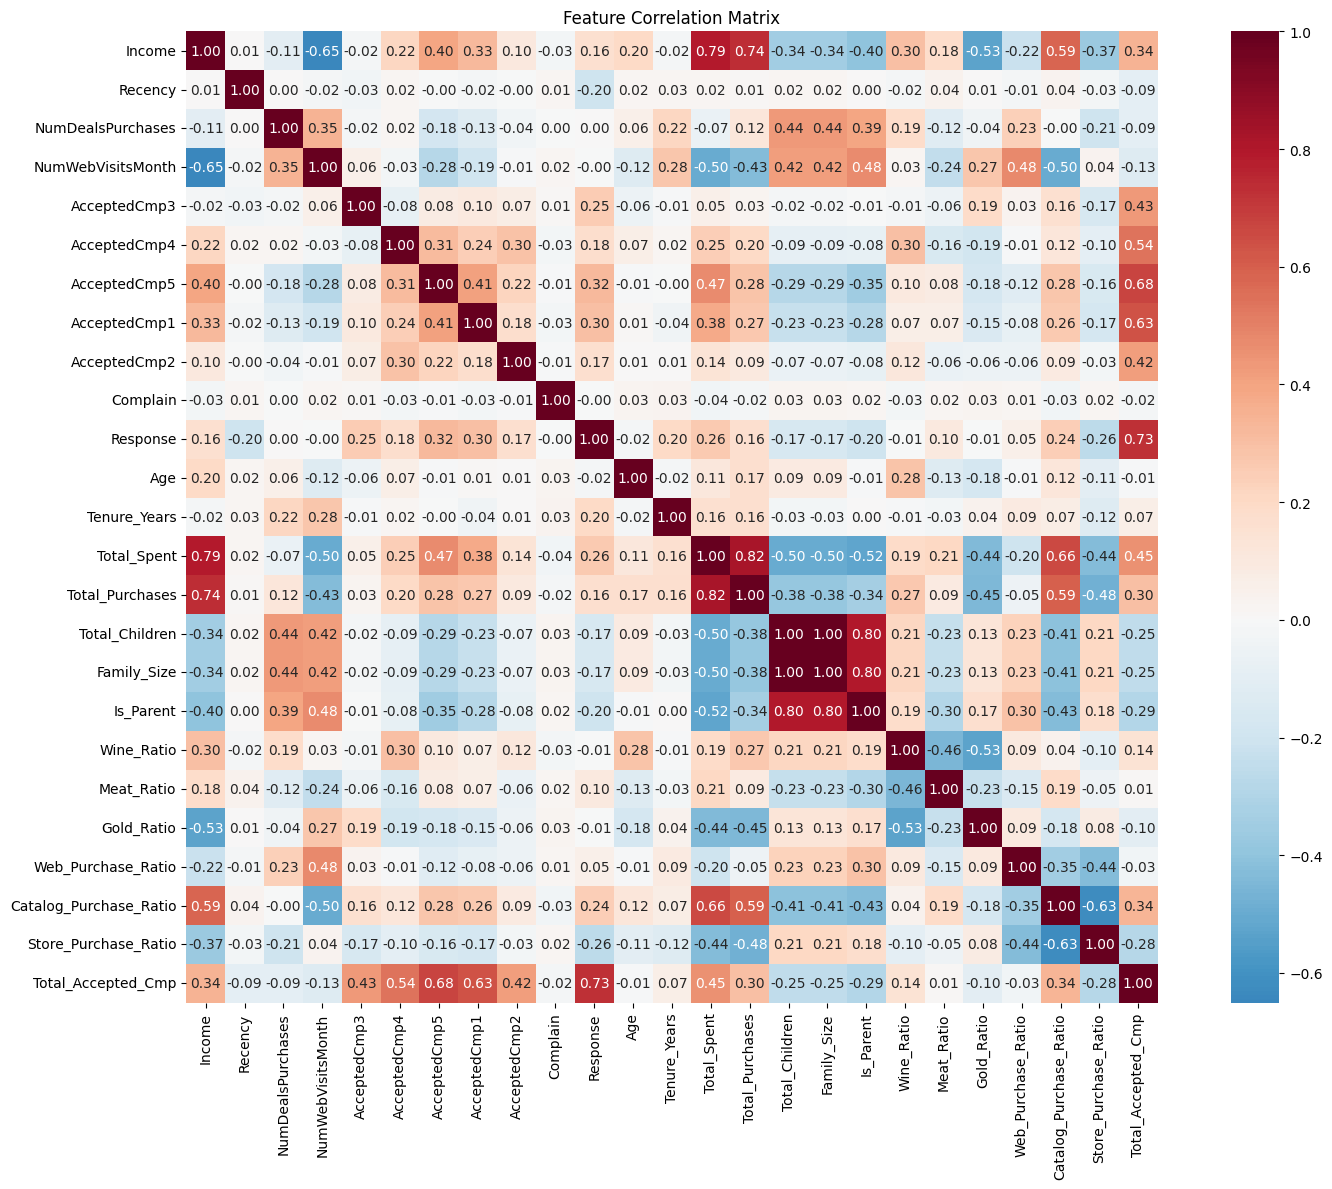

In [0]:
corr_matrix = df_clean.corr()

plt.figure(figsize=(16, 12))

# Create a heatmap
sns.heatmap(corr_matrix,
            annot=True,    
            fmt=".2f",     
            cmap='RdBu_r', 
            center=0,      
            square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [0]:
multicollinear_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Total_Children']
df_clean = df_clean.drop(columns=multicollinear_columns)
print(f"New number of features: {len(df_clean.columns)}")
print(df_clean.shape)

New number of features: 20
(2215, 20)


## **Data Encoding and Scaling**

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df_final = df_clean.copy()

# For Education: Use mapping (since it's ordinal)
education_mapping = {
    'Undergraduate': 0,
    'Graduation': 1,
    'Master': 2,
    'PhD': 3
}

df_final['Education'] = df_final['Education'].map(education_mapping)

# For Marital_Status: Use one-hot encoding (since it's nominal)
marital_status_dummies = pd.get_dummies(df_final['Marital_Status'], prefix='Marital')

# Concatenate the one-hot encoded columns with the original dataframe
df_final = pd.concat([df_final, marital_status_dummies], axis=1)

# Drop the original Marital_Status column
df_final = df_final.drop('Marital_Status', axis=1)

# Display the result
print("Education mapping applied:")
print(education_mapping)
print("\nFirst 5 rows with transformed features:")
print(df_final[['Education'] + list(marital_status_dummies.columns)].head())

# Initialize the StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_final)

df_scaled = pd.DataFrame(df_scaled, columns=df_final.columns)

print("\nFirst 5 rows of the SCALED dataset:")
print(df_scaled.head())
print(f"\nShape of the scaled data: {df_scaled.shape}")

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffd09173b240>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'


Education mapping applied:
{'Undergraduate': 0, 'Graduation': 1, 'Master': 2, 'PhD': 3}

First 5 rows with transformed features:
   Education  Marital_Partner  Marital_Single
0          1                0               1
1          1                0               1
2          1                1               0
3          1                1               0
4          3                1               0

First 5 rows of the SCALED dataset:
   Education    Income  ...  Marital_Partner  Marital_Single
0  -0.791545  0.286604  ...        -1.348357        1.348357
1  -0.791545 -0.261407  ...        -1.348357        1.348357
2  -0.791545  0.912723  ...         0.741643       -0.741643
3  -0.791545 -1.176680  ...         0.741643       -0.741643
4   1.589001  0.293806  ...         0.741643       -0.741643

[5 rows x 21 columns]

Shape of the scaled data: (2215, 21)


# Data Modeling: **Clustering**

## **Dimensionality Reduction with PCA**

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
pca = PCA()
pca.fit(df_scaled)

explained_variance = pca.explained_variance_ratio_

cumulative_variance = explained_variance.cumsum()


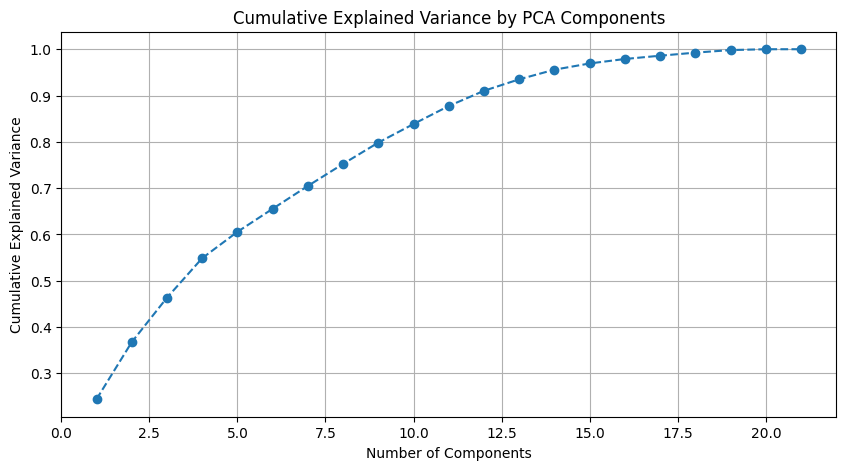

In [0]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [0]:
pca = PCA(n_components=3) 
df_pca = pca.fit_transform(df_scaled)

import pandas as pd
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])

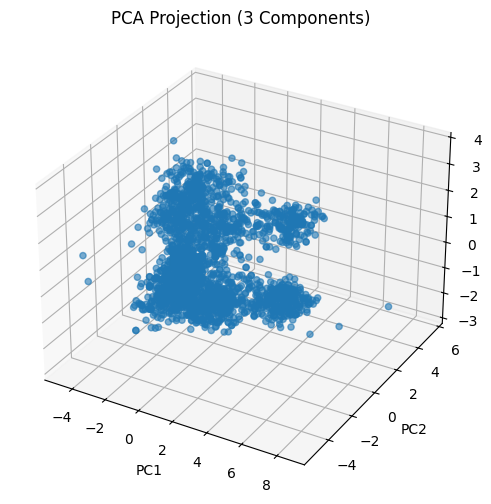

In [0]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
df_pca3 = pca.fit_transform(df_scaled)

df_pca3 = pd.DataFrame(df_pca3, columns=['PC1', 'PC2', 'PC3'])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca3['PC1'], df_pca3['PC2'], df_pca3['PC3'], alpha=0.6)

ax.set_title('PCA Projection (3 Components)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


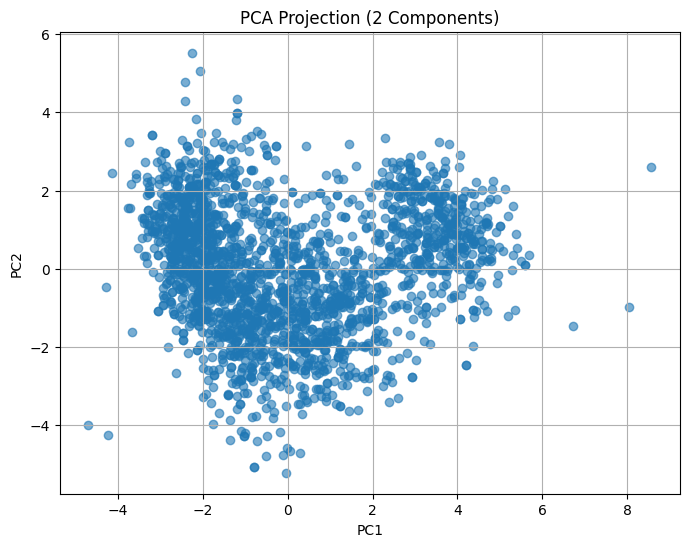

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

pca = PCA(n_components=2)
df_pca2 = pca.fit_transform(df_scaled)

df_pca2 = pd.DataFrame(df_pca2, columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
plt.scatter(df_pca2['PC1'], df_pca2['PC2'], alpha=0.6)

plt.title('PCA Projection (2 Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

## **Cluster Analysis with K-Means**

### **Determining the Optimal Number of Clusters**

In [0]:
from sklearn.cluster import KMeans

pca = PCA(n_components=10)
df_pca10 = pca.fit_transform(df_scaled)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffd071a6b240>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

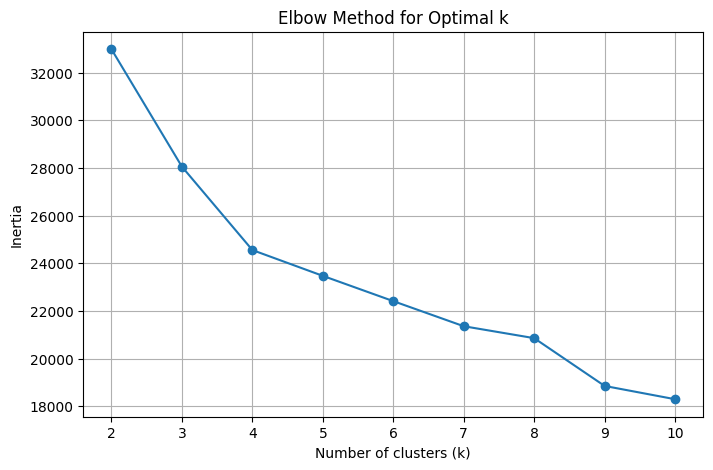

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(2, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca10)  
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffd06e8923e0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex

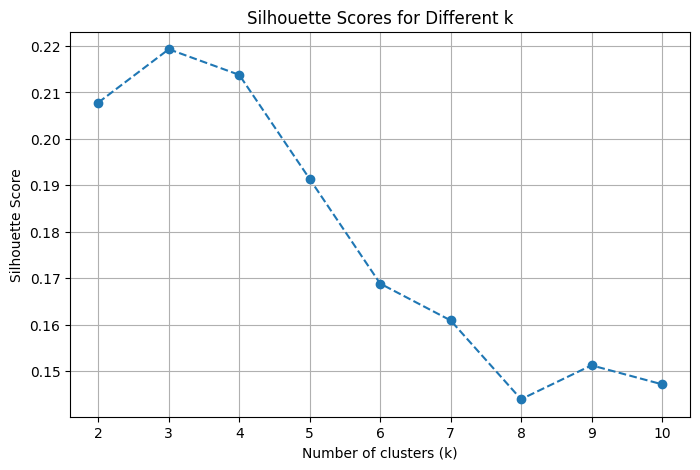

In [0]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

silhouette_scores = []
K = range(2, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca10)  
    score = silhouette_score(df_pca10, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)
plt.show()



### **Fitting the K-Means Model**

In [0]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)  
clusters = kmeans.fit_predict(df_pca10)

df_pca10 = pd.DataFrame(df_pca10, columns=[f'PC{i+1}' for i in range(10)])
df_pca10['Cluster'] = clusters

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffd071d46ca0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'


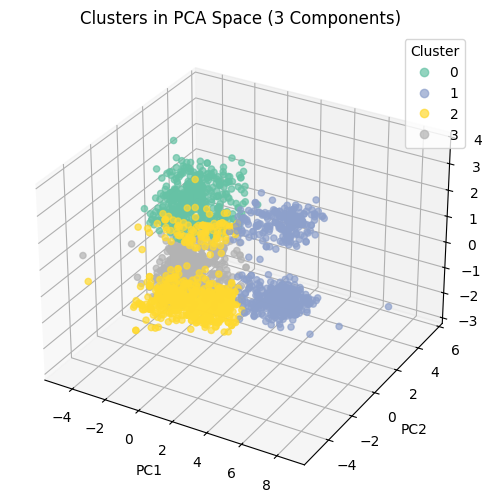

In [0]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca10['PC1'], df_pca10['PC2'], df_pca10['PC3'],
                     c=df_pca10['Cluster'], cmap='Set2', alpha=0.7)

ax.set_title('Clusters in PCA Space (3 Components)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


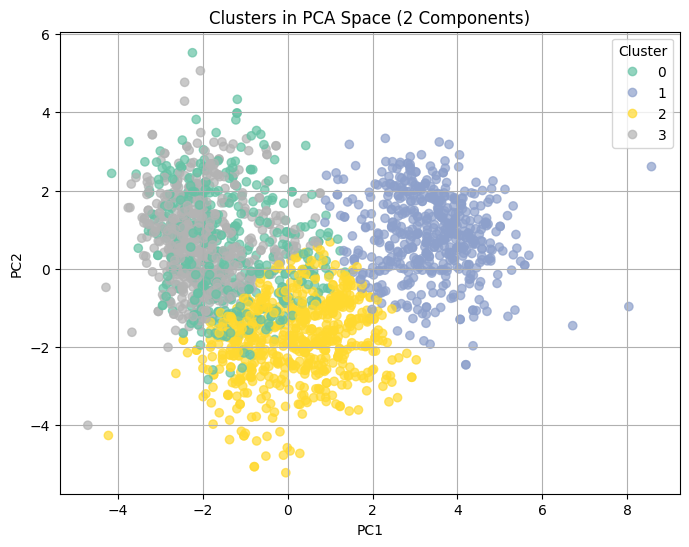

In [0]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df_pca10['PC1'], df_pca10['PC2'],
                     c=df_pca10['Cluster'], cmap='Set2', alpha=0.7)

plt.title('Clusters in PCA Space (2 Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

# **Customer Profiling**

In [0]:
df_clusters = df_scaled.copy()
df_clusters['Cluster'] = df_pca10['Cluster']

cluster_profile = df_clusters.groupby('Cluster')[[
    'Income','Total_Spent','Total_Purchases',
    'Web_Purchase_Ratio','Catalog_Purchase_Ratio','Store_Purchase_Ratio',
    'Wine_Ratio','Meat_Ratio','Gold_Ratio',
    'Age','Family_Size','Is_Parent'
]].mean().round(2)

print(cluster_profile)


         Income  Total_Spent  Total_Purchases  ...   Age  Family_Size  Is_Parent
Cluster                                        ...                              
0         -0.60        -0.66            -0.62  ... -0.11         0.36       0.38
1          1.14         1.26             0.91  ...  0.06        -1.18      -1.44
2          0.32         0.24             0.58  ...  0.34         0.41       0.57
3         -0.87        -0.84            -0.93  ... -0.32         0.31       0.35

[4 rows x 12 columns]


In [0]:
display(cluster_profile)

Income,Total_Spent,Total_Purchases,Web_Purchase_Ratio,Catalog_Purchase_Ratio,Store_Purchase_Ratio,Wine_Ratio,Meat_Ratio,Gold_Ratio,Age,Family_Size,Is_Parent
-0.6,-0.66,-0.62,0.13,-0.48,0.31,-0.25,-0.07,0.4,-0.11,0.36,0.38
1.14,1.26,0.91,-0.6,1.07,-0.52,-0.13,0.7,-0.55,0.06,-1.18,-1.44
0.32,0.24,0.58,0.34,0.15,-0.4,0.78,-0.55,-0.39,0.34,0.41,0.57
-0.87,-0.84,-0.93,0.06,-0.71,0.63,-0.52,0.04,0.58,-0.32,0.31,0.35


DEMOGRAPHIC & STATUS FEATURES ANALYSIS

1. NUMERICAL FEATURES BY CLUSTER


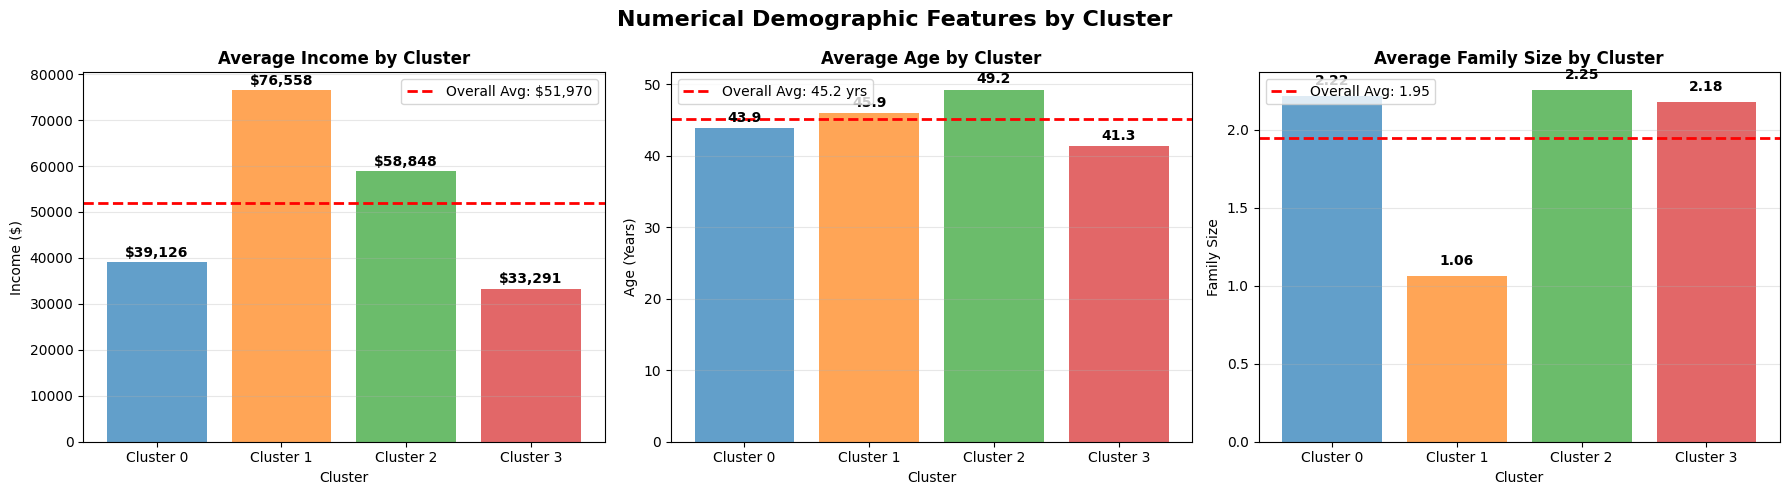


2. EDUCATION DISTRIBUTION BY CLUSTER


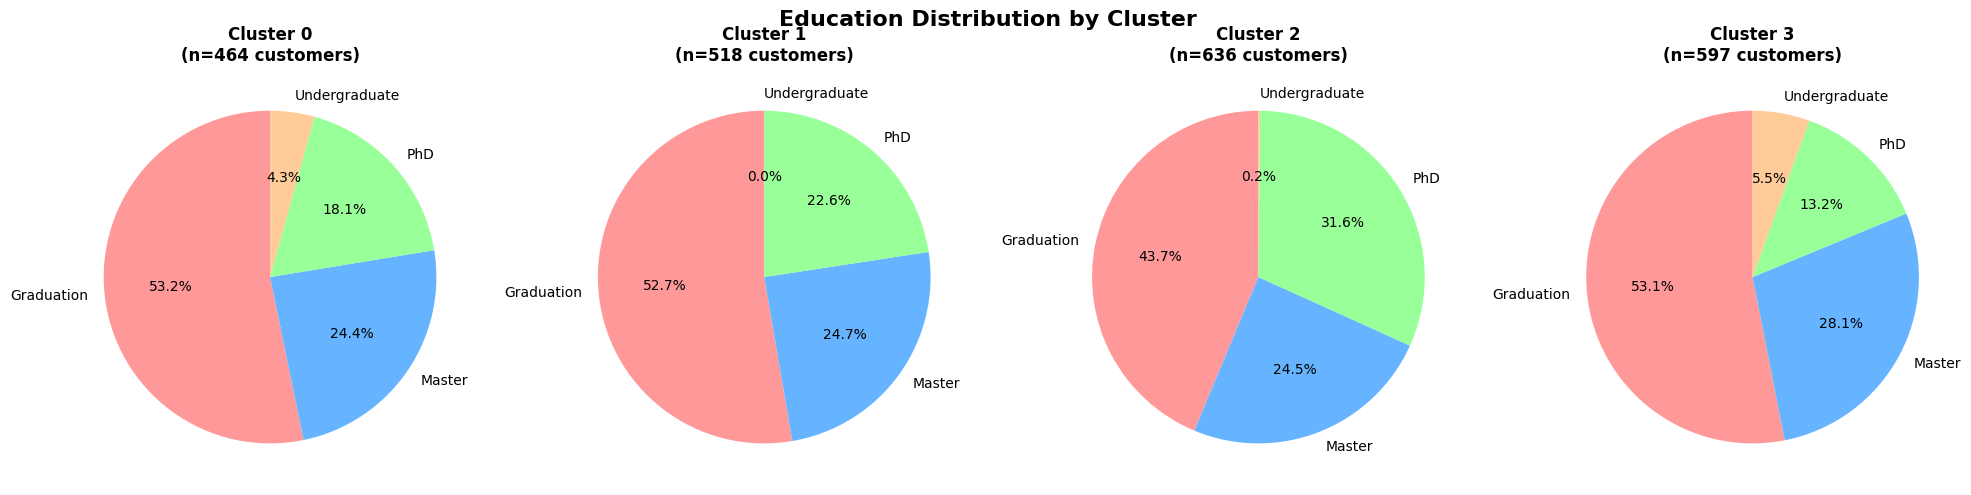


3. MARITAL STATUS DISTRIBUTION BY CLUSTER


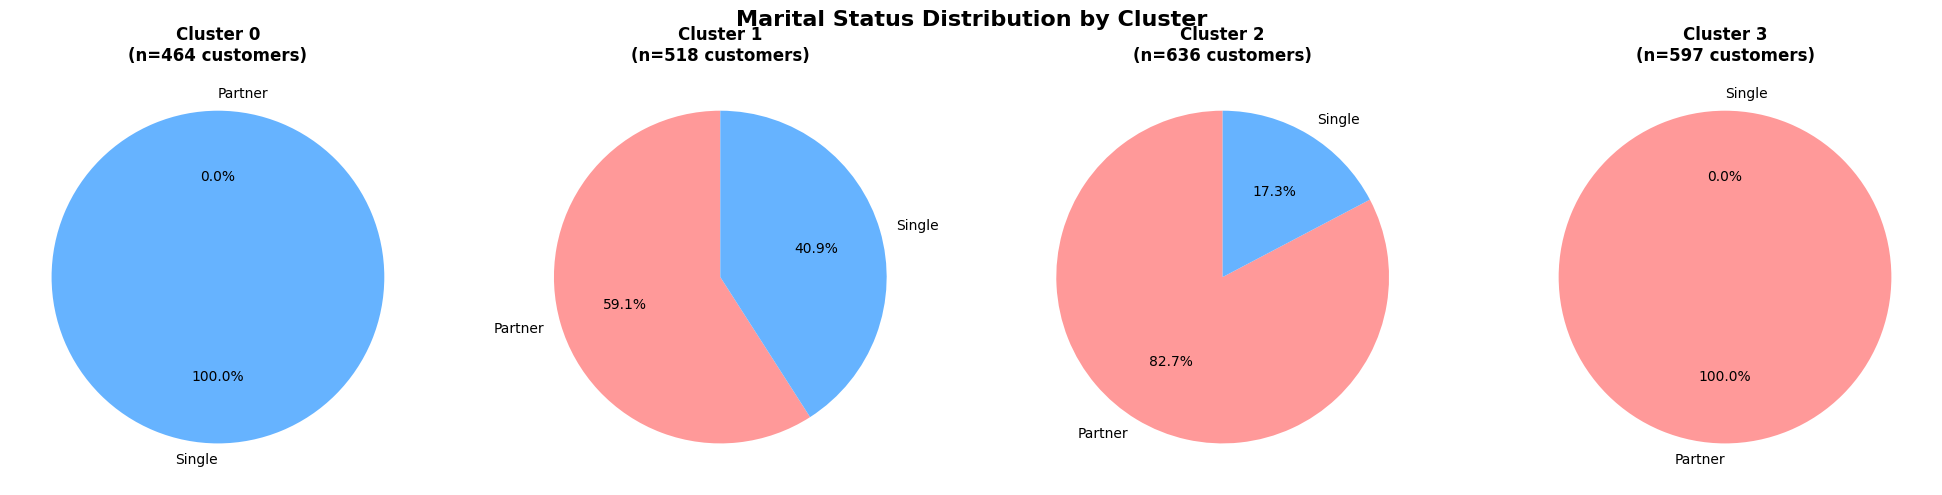


4. PARENT STATUS DISTRIBUTION BY CLUSTER


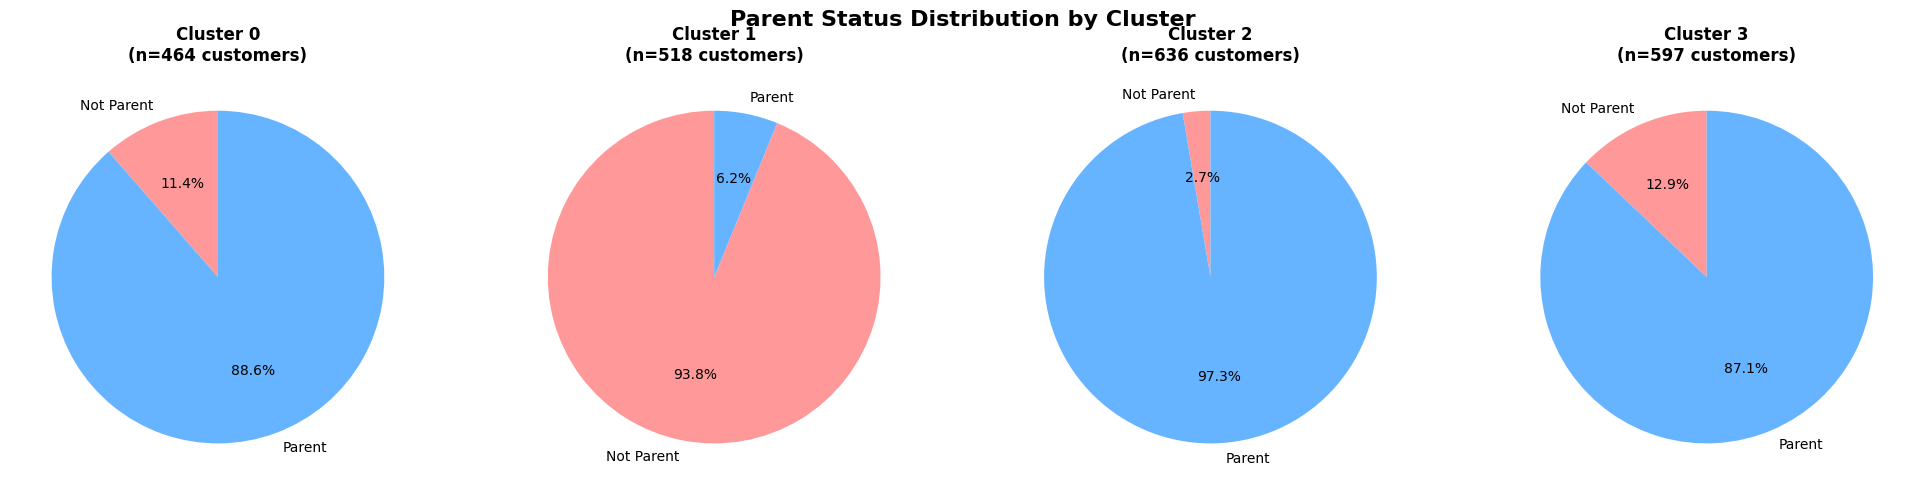


5. DEMOGRAPHIC SUMMARY STATISTICS BY CLUSTER
           Income              Age        Family_Size       Is_Parent
             mean       std   mean    std        mean   std      mean
Cluster                                                              
0        39126.06  14985.73  43.85  12.06        2.22  0.68      0.89
1        76557.67  13742.22  45.93  14.15        1.06  0.24      0.06
2        58848.16  13248.97  49.20   9.62        2.25  0.55      0.97
3        33290.54  11924.95  41.29  10.69        2.18  0.68      0.87

Overall Averages:
Income: $51,969.86
Age: 45.18 years
Family Size: 1.95
Parent Percentage: 71.4%


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Add cluster labels back to your original cleaned dataset
df_segmented = df_clean.copy()
df_segmented['Cluster'] = clusters

# Demographic & Status Features
print("DEMOGRAPHIC & STATUS FEATURES ANALYSIS")
print("="*50)

# 1. NUMERICAL FEATURES 
print("\n1. NUMERICAL FEATURES BY CLUSTER")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Numerical Demographic Features by Cluster', fontsize=16, fontweight='bold')

# Calculate overall averages for the entire dataset
overall_income_avg = df_segmented['Income'].mean()
overall_age_avg = df_segmented['Age'].mean()
overall_family_avg = df_segmented['Family_Size'].mean()

# Income Bar Chart
income_by_cluster = df_segmented.groupby('Cluster')['Income'].mean()
bars1 = axes[0].bar(range(len(income_by_cluster)), income_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[0].axhline(y=overall_income_avg, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: ${overall_income_avg:,.0f}')
axes[0].set_title('Average Income by Cluster', fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Income ($)')
axes[0].set_xticks(range(len(income_by_cluster)))
axes[0].set_xticklabels([f'Cluster {i}' for i in range(len(income_by_cluster))])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 500, 
                f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

# Age Bar Chart
age_by_cluster = df_segmented.groupby('Cluster')['Age'].mean()
bars2 = axes[1].bar(range(len(age_by_cluster)), age_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[1].axhline(y=overall_age_avg, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: {overall_age_avg:.1f} yrs')
axes[1].set_title('Average Age by Cluster', fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Age (Years)')
axes[1].set_xticks(range(len(age_by_cluster)))
axes[1].set_xticklabels([f'Cluster {i}' for i in range(len(age_by_cluster))])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5, 
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Family Size Bar Chart
family_by_cluster = df_segmented.groupby('Cluster')['Family_Size'].mean()
bars3 = axes[2].bar(range(len(family_by_cluster)), family_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[2].axhline(y=overall_family_avg, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: {overall_family_avg:.2f}')
axes[2].set_title('Average Family Size by Cluster', fontweight='bold')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Family Size')
axes[2].set_xticks(range(len(family_by_cluster)))
axes[2].set_xticklabels([f'Cluster {i}' for i in range(len(family_by_cluster))])
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)


for i, bar in enumerate(bars3):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.05, 
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. EDUCATION 
print("\n2. EDUCATION DISTRIBUTION BY CLUSTER")
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Education Distribution by Cluster', fontsize=16, fontweight='bold')

cluster_education = pd.crosstab(df_segmented['Cluster'], df_segmented['Education'], normalize='index')
colors_education = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

for i, cluster in enumerate(range(4)):
    education_data = cluster_education.loc[cluster]
    axes[i].pie(education_data, labels=education_data.index, autopct='%1.1f%%', 
                startangle=90, colors=colors_education[:len(education_data)])
    axes[i].set_title(f'Cluster {cluster}\n(n={len(df_segmented[df_segmented["Cluster"]==cluster])} customers)',
                     fontweight='bold')

plt.tight_layout()
plt.show()

# 3. MARITAL STATUS 
print("\n3. MARITAL STATUS DISTRIBUTION BY CLUSTER")
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Marital Status Distribution by Cluster', fontsize=16, fontweight='bold')

cluster_marital = pd.crosstab(df_segmented['Cluster'], df_segmented['Marital_Status'], normalize='index')
colors_marital = ['#ff9999', '#66b3ff']

for i, cluster in enumerate(range(4)):
    marital_data = cluster_marital.loc[cluster]
    axes[i].pie(marital_data, labels=marital_data.index, autopct='%1.1f%%', 
                startangle=90, colors=colors_marital[:len(marital_data)])
    axes[i].set_title(f'Cluster {cluster}\n(n={len(df_segmented[df_segmented["Cluster"]==cluster])} customers)',
                     fontweight='bold')

plt.tight_layout()
plt.show()

# 4. IS_PARENT 
print("\n4. PARENT STATUS DISTRIBUTION BY CLUSTER")
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Parent Status Distribution by Cluster', fontsize=16, fontweight='bold')

# Map 0/1 to more meaningful labels
df_segmented['Is_Parent_Label'] = df_segmented['Is_Parent'].map({0: 'Not Parent', 1: 'Parent'})
cluster_parent = pd.crosstab(df_segmented['Cluster'], df_segmented['Is_Parent_Label'], normalize='index')
colors_parent = ['#ff9999', '#66b3ff']

for i, cluster in enumerate(range(4)):
    parent_data = cluster_parent.loc[cluster]
    axes[i].pie(parent_data, labels=parent_data.index, autopct='%1.1f%%', 
                startangle=90, colors=colors_parent[:len(parent_data)])
    axes[i].set_title(f'Cluster {cluster}\n(n={len(df_segmented[df_segmented["Cluster"]==cluster])} customers)',
                     fontweight='bold')

plt.tight_layout()
plt.show()

# Clean up temporary column
df_segmented.drop('Is_Parent_Label', axis=1, inplace=True)

# Summary statistics
print("\n5. DEMOGRAPHIC SUMMARY STATISTICS BY CLUSTER")
print("="*60)
demographic_summary = df_segmented.groupby('Cluster').agg({
    'Income': ['mean', 'std'],
    'Age': ['mean', 'std'],
    'Family_Size': ['mean', 'std'],
    'Is_Parent': 'mean'
}).round(2)

print(demographic_summary)

# Print overall averages for reference
print(f"\nOverall Averages:")
print(f"Income: ${overall_income_avg:,.2f}")
print(f"Age: {overall_age_avg:.2f} years")
print(f"Family Size: {overall_family_avg:.2f}")
print(f"Parent Percentage: {df_segmented['Is_Parent'].mean()*100:.1f}%")

DEMOGRAPHIC & STATUS FEATURES ANALYSIS

1. DISTRIBUTION OF NUMERICAL FEATURES BY CLUSTER


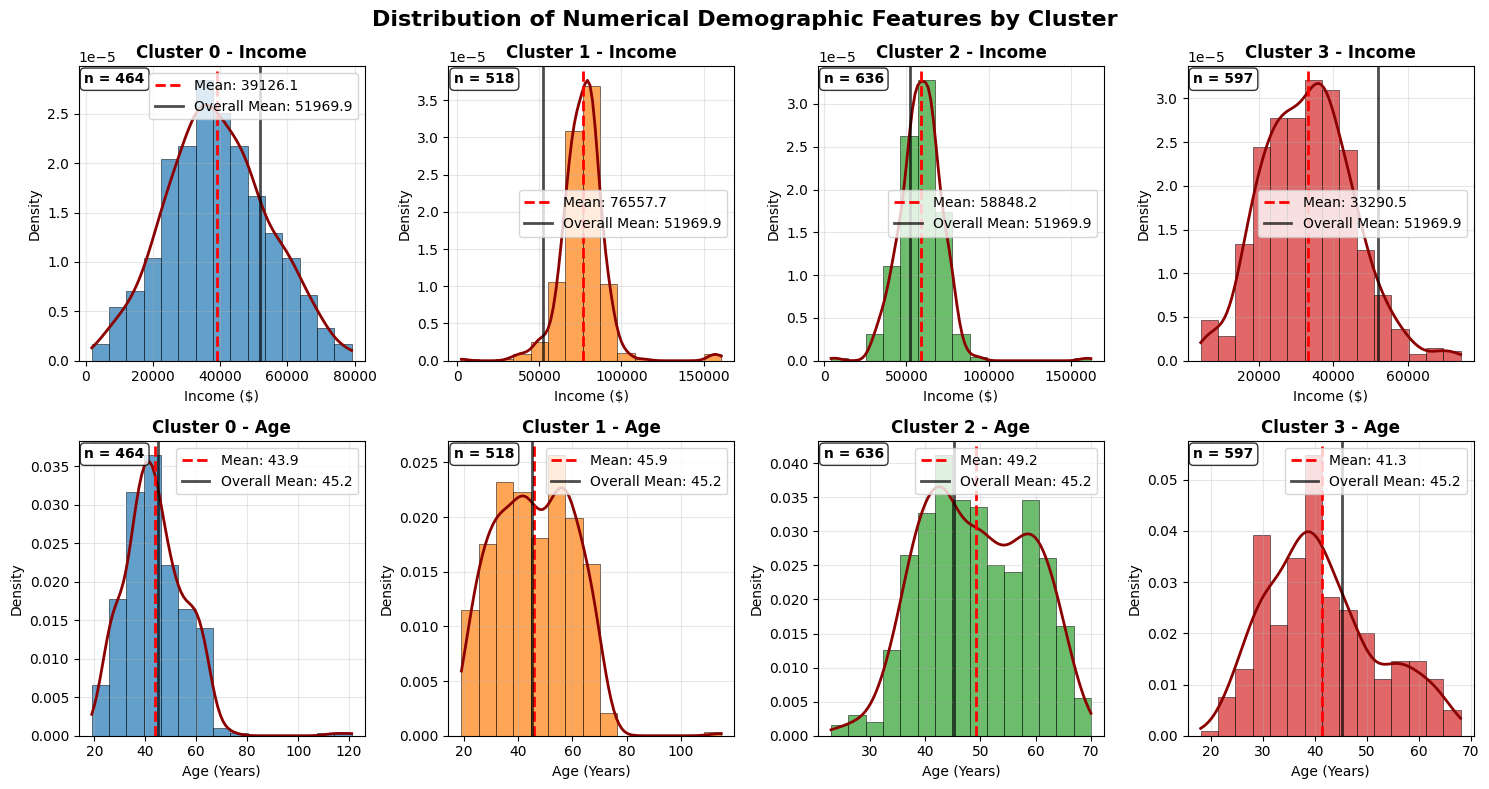

In [0]:

df_segmented = df_clean.copy()
df_segmented['Cluster'] = clusters

# DISTRIBUTION PLOTS - For Income and Age
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
features = ['Income', 'Age']
feature_titles = ['Income Distribution', 'Age Distribution']
feature_units = ['($)', '(Years)']

# Create distribution plots for each feature and cluster
for row, feature in enumerate(features):
    for col, cluster_num in enumerate(range(4)):
        # Get data for this cluster and feature
        cluster_data = df_segmented[df_segmented['Cluster'] == cluster_num][feature]
        
        # Create histogram with density curve
        axes[row, col].hist(cluster_data, bins=15, alpha=0.7, color=cluster_colors[col], 
                           density=True, edgecolor='black', linewidth=0.5)
        
        # Add density curve
        import numpy as np
        from scipy.stats import gaussian_kde
        if len(cluster_data) > 1:  
            kde = gaussian_kde(cluster_data)
            x_range = np.linspace(cluster_data.min(), cluster_data.max(), 100)
            axes[row, col].plot(x_range, kde(x_range), color='darkred', linewidth=2)
        
        # Add vertical line for mean
        mean_val = cluster_data.mean()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                              label=f'Mean: {mean_val:.1f}')
        
        # Add overall average line for comparison
        overall_mean = df_segmented[feature].mean()
        axes[row, col].axvline(overall_mean, color='black', linestyle='-', linewidth=2, 
                              alpha=0.7, label=f'Overall Mean: {overall_mean:.1f}')
        
        axes[row, col].set_title(f'Cluster {cluster_num} - {feature}', fontweight='bold')
        axes[row, col].set_xlabel(f'{feature} {feature_units[row]}')
        axes[row, col].set_ylabel('Density')
        axes[row, col].legend()
        axes[row, col].grid(alpha=0.3)
        
        n_samples = len(cluster_data)
        axes[row, col].text(0.02, 0.98, f'n = {n_samples}', transform=axes[row, col].transAxes, 
                           verticalalignment='top', fontweight='bold', 
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


ENGAGEMENT & TENURE FEATURES ANALYSIS

1. ENGAGEMENT & TENURE FEATURES BY CLUSTER


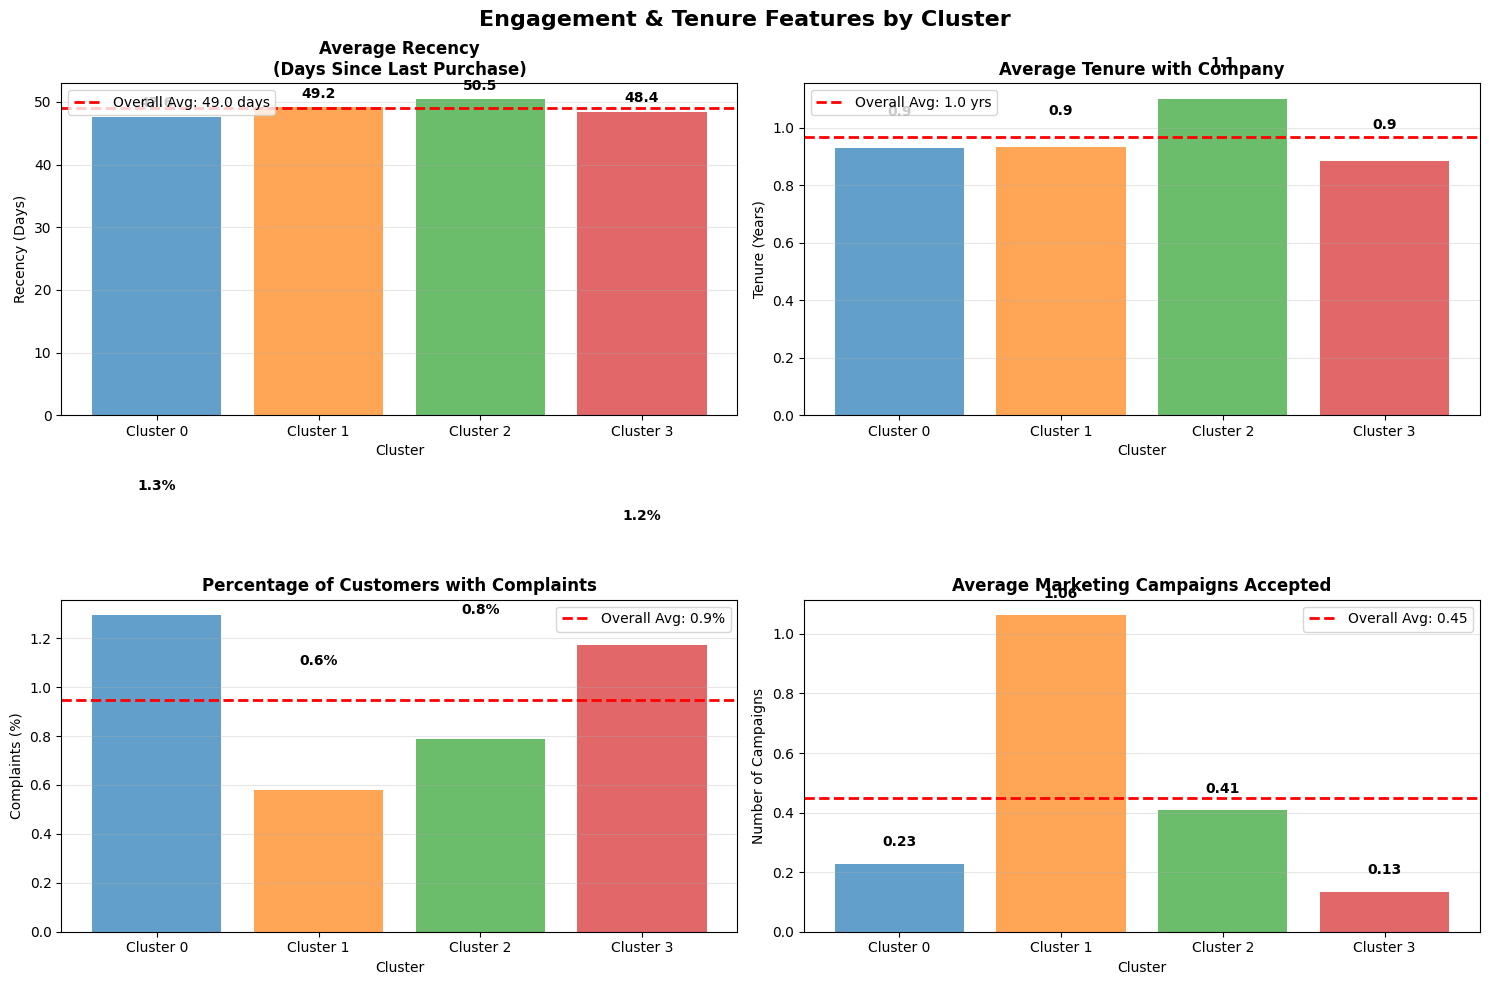


2. ENGAGEMENT & TENURE SUMMARY STATISTICS BY CLUSTER
        Recency        Tenure_Years       Complain Total_Accepted_Cmp      
           mean    std         mean   std     mean               mean   std
Cluster                                                                    
0         47.64  28.74         0.93  0.55     0.01               0.23  0.54
1         49.16  28.99         0.93  0.56     0.01               1.06  1.33
2         50.47  28.52         1.10  0.54     0.01               0.41  0.74
3         48.44  29.53         0.88  0.54     0.01               0.13  0.40

Overall Averages:
Recency: 49.0 days since last purchase
Tenure: 1.0 years with company
Complaints: 0.9% of customers
Campaigns Accepted: 0.45 per customer

3. KEY INSIGHTS:
----------------------------------------
• Cluster 0 has the most recent purchases (lowest recency)
• Cluster 2 has the least recent purchases (highest recency)
• Cluster 2 has the longest tenure (most loyal customers)
• Cluster 3 has the 

In [0]:
# Engagement & Tenure Features 
print("ENGAGEMENT & TENURE FEATURES ANALYSIS")
print("="*50)

overall_recency_avg = df_segmented['Recency'].mean()
overall_tenure_avg = df_segmented['Tenure_Years'].mean()
overall_complain_avg = df_segmented['Complain'].mean()
overall_campaign_avg = df_segmented['Total_Accepted_Cmp'].mean()

print("\n1. ENGAGEMENT & TENURE FEATURES BY CLUSTER")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Engagement & Tenure Features by Cluster', fontsize=16, fontweight='bold')

axes = axes.ravel()

# 1. Recency Bar Chart 
recency_by_cluster = df_segmented.groupby('Cluster')['Recency'].mean()
bars1 = axes[0].bar(range(len(recency_by_cluster)), recency_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[0].axhline(y=overall_recency_avg, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: {overall_recency_avg:.1f} days')
axes[0].set_title('Average Recency\n(Days Since Last Purchase)', fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Recency (Days)')
axes[0].set_xticks(range(len(recency_by_cluster)))
axes[0].set_xticklabels([f'Cluster {i}' for i in range(len(recency_by_cluster))])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 1, 
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Tenure_Years Bar Chart 
tenure_by_cluster = df_segmented.groupby('Cluster')['Tenure_Years'].mean()
bars2 = axes[1].bar(range(len(tenure_by_cluster)), tenure_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[1].axhline(y=overall_tenure_avg, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: {overall_tenure_avg:.1f} yrs')
axes[1].set_title('Average Tenure with Company', fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Tenure (Years)')
axes[1].set_xticks(range(len(tenure_by_cluster)))
axes[1].set_xticklabels([f'Cluster {i}' for i in range(len(tenure_by_cluster))])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.1, 
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Complain Bar Chart 
complain_by_cluster = df_segmented.groupby('Cluster')['Complain'].mean() * 100  # Convert to percentage
bars3 = axes[2].bar(range(len(complain_by_cluster)), complain_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[2].axhline(y=overall_complain_avg * 100, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: {overall_complain_avg * 100:.1f}%')
axes[2].set_title('Percentage of Customers with Complaints', fontweight='bold')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Complaints (%)')
axes[2].set_xticks(range(len(complain_by_cluster)))
axes[2].set_xticklabels([f'Cluster {i}' for i in range(len(complain_by_cluster))])
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars3):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.5, 
                f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Total_Accepted_Cmp Bar Chart 
campaign_by_cluster = df_segmented.groupby('Cluster')['Total_Accepted_Cmp'].mean()
bars4 = axes[3].bar(range(len(campaign_by_cluster)), campaign_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[3].axhline(y=overall_campaign_avg, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: {overall_campaign_avg:.2f}')
axes[3].set_title('Average Marketing Campaigns Accepted', fontweight='bold')
axes[3].set_xlabel('Cluster')
axes[3].set_ylabel('Number of Campaigns')
axes[3].set_xticks(range(len(campaign_by_cluster)))
axes[3].set_xticklabels([f'Cluster {i}' for i in range(len(campaign_by_cluster))])
axes[3].legend()
axes[3].grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars4):
    height = bar.get_height()
    axes[3].text(bar.get_x() + bar.get_width()/2., height + 0.05, 
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n2. ENGAGEMENT & TENURE SUMMARY STATISTICS BY CLUSTER")
print("="*60)
engagement_summary = df_segmented.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Tenure_Years': ['mean', 'std'],
    'Complain': 'mean',
    'Total_Accepted_Cmp': ['mean', 'std']
}).round(2)

print(engagement_summary)


print(f"\nOverall Averages:")
print(f"Recency: {overall_recency_avg:.1f} days since last purchase")
print(f"Tenure: {overall_tenure_avg:.1f} years with company")
print(f"Complaints: {overall_complain_avg * 100:.1f}% of customers")
print(f"Campaigns Accepted: {overall_campaign_avg:.2f} per customer")


print(f"\n3. KEY INSIGHTS:")
print("-" * 40)

# Recency insights
lowest_recency_cluster = recency_by_cluster.idxmin()
highest_recency_cluster = recency_by_cluster.idxmax()
print(f"• Cluster {lowest_recency_cluster} has the most recent purchases (lowest recency)")
print(f"• Cluster {highest_recency_cluster} has the least recent purchases (highest recency)")

# Tenure insights
lowest_tenure_cluster = tenure_by_cluster.idxmin()
highest_tenure_cluster = tenure_by_cluster.idxmax()
print(f"• Cluster {highest_tenure_cluster} has the longest tenure (most loyal customers)")
print(f"• Cluster {lowest_tenure_cluster} has the shortest tenure (newest customers)")

# Campaign responsiveness insights
most_responsive_cluster = campaign_by_cluster.idxmax()
least_responsive_cluster = campaign_by_cluster.idxmin()
print(f"• Cluster {most_responsive_cluster} is most responsive to marketing campaigns")
print(f"• Cluster {least_responsive_cluster} is least responsive to marketing campaigns")

# Complaint insights
if overall_complain_avg > 0:
    highest_complaint_cluster = complain_by_cluster.idxmax()
    print(f"• Cluster {highest_complaint_cluster} has the highest complaint rate")


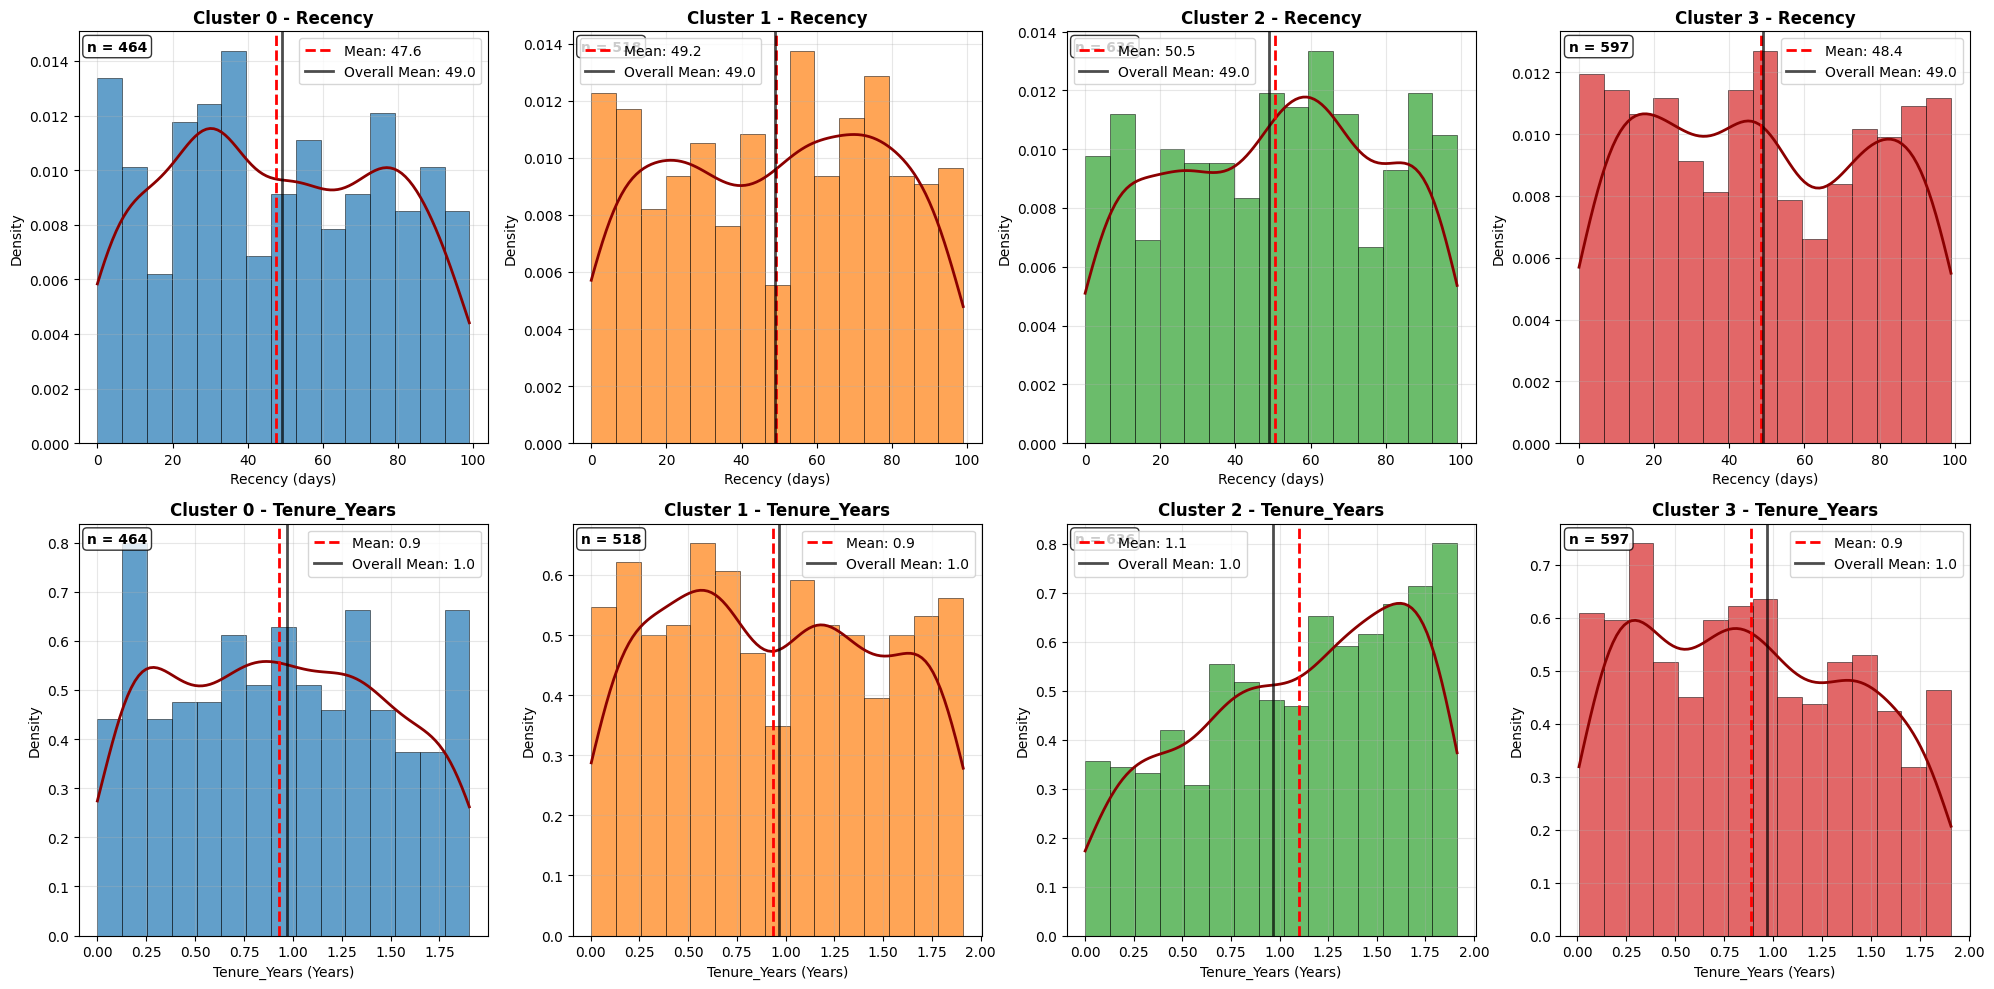

In [0]:

cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
features = ['Recency', 'Tenure_Years']
feature_titles = ['Income Distribution', 'Age Distribution']
feature_units = ['(days)', '(Years)']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Create distribution plots for each feature and cluster
for row, feature in enumerate(features):
    for col, cluster_num in enumerate(range(4)):
        
        # Get data for this cluster and feature
        cluster_data = df_segmented[df_segmented['Cluster'] == cluster_num][feature]
        
        # Create histogram with density curve
        axes[row, col].hist(cluster_data, bins=15, alpha=0.7, color=cluster_colors[col], 
                           density=True, edgecolor='black', linewidth=0.5)
        
        # Add density curve
        import numpy as np
        from scipy.stats import gaussian_kde
        if len(cluster_data) > 1:  
            kde = gaussian_kde(cluster_data)
            x_range = np.linspace(cluster_data.min(), cluster_data.max(), 100)
            axes[row, col].plot(x_range, kde(x_range), color='darkred', linewidth=2)
        
        # Add vertical line for mean
        mean_val = cluster_data.mean()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                              label=f'Mean: {mean_val:.1f}')
        
        # Add overall average line for comparison
        overall_mean = df_segmented[feature].mean()
        axes[row, col].axvline(overall_mean, color='black', linestyle='-', linewidth=2, 
                              alpha=0.7, label=f'Overall Mean: {overall_mean:.1f}')
        
        axes[row, col].set_title(f'Cluster {cluster_num} - {feature}', fontweight='bold')
        axes[row, col].set_xlabel(f'{feature} {feature_units[row]}')
        axes[row, col].set_ylabel('Density')
        axes[row, col].legend()
        axes[row, col].grid(alpha=0.3)
        
        n_samples = len(cluster_data)
        axes[row, col].text(0.02, 0.98, f'n = {n_samples}', transform=axes[row, col].transAxes, 
                           verticalalignment='top', fontweight='bold', 
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

OVERALL SPENDING & ACTIVITY FEATURES ANALYSIS

1. OVERALL SPENDING & ACTIVITY FEATURES BY CLUSTER


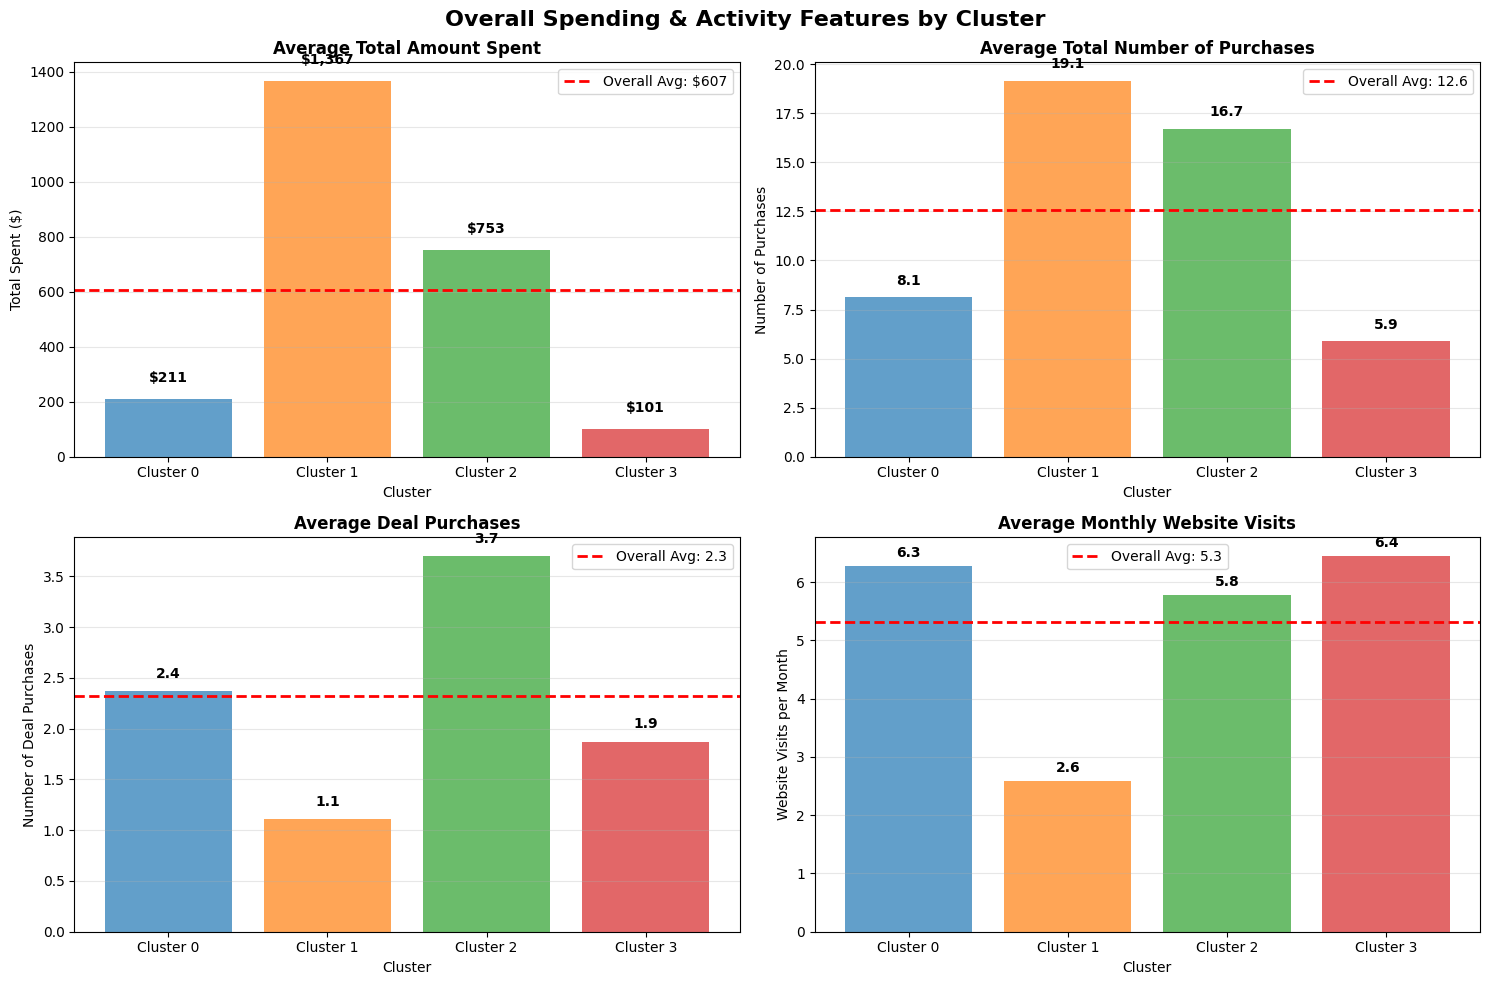


2. SPENDING & ACTIVITY SUMMARY STATISTICS BY CLUSTER
        Total_Spent         Total_Purchases  ... NumDealsPurchases NumWebVisitsMonth      
               mean     std            mean  ...               std              mean   std
Cluster                                      ...                                          
0            211.03  258.08            8.12  ...              1.63              6.27  1.99
1           1366.81  454.16           19.14  ...              1.15              2.59  1.69
2            753.01  435.22           16.71  ...              2.34              5.78  1.95
3            101.14  122.50            5.88  ...              1.09              6.45  1.89

[4 rows x 8 columns]

Overall Averages:
Total Spent: $607
Total Purchases: 12.6
Deal Purchases: 2.3
Monthly Website Visits: 5.3

3. KEY INSIGHTS:
----------------------------------------
• Cluster 1 are the highest spenders
• Cluster 3 are the lowest spenders
• Cluster 1 makes the most purchases
• Cluster 3

In [0]:
# Overall Spending & Activity Features 
print("OVERALL SPENDING & ACTIVITY FEATURES ANALYSIS")
print("="*50)

overall_spent_avg = df_segmented['Total_Spent'].mean()
overall_purchases_avg = df_segmented['Total_Purchases'].mean()
overall_deals_avg = df_segmented['NumDealsPurchases'].mean()
overall_webvisits_avg = df_segmented['NumWebVisitsMonth'].mean()

print("\n1. OVERALL SPENDING & ACTIVITY FEATURES BY CLUSTER")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Overall Spending & Activity Features by Cluster', fontsize=16, fontweight='bold')

axes = axes.ravel()

# 1. Total_Spent Bar Chart
spent_by_cluster = df_segmented.groupby('Cluster')['Total_Spent'].mean()
bars1 = axes[0].bar(range(len(spent_by_cluster)), spent_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[0].axhline(y=overall_spent_avg, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: ${overall_spent_avg:,.0f}')
axes[0].set_title('Average Total Amount Spent', fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Total Spent ($)')
axes[0].set_xticks(range(len(spent_by_cluster)))
axes[0].set_xticklabels([f'Cluster {i}' for i in range(len(spent_by_cluster))])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 50, 
                f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

# 2. Total_Purchases Bar Chart 
purchases_by_cluster = df_segmented.groupby('Cluster')['Total_Purchases'].mean()
bars2 = axes[1].bar(range(len(purchases_by_cluster)), purchases_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[1].axhline(y=overall_purchases_avg, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: {overall_purchases_avg:.1f}')
axes[1].set_title('Average Total Number of Purchases', fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Purchases')
axes[1].set_xticks(range(len(purchases_by_cluster)))
axes[1].set_xticklabels([f'Cluster {i}' for i in range(len(purchases_by_cluster))])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5, 
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. NumDealsPurchases Bar Chart 
deals_by_cluster = df_segmented.groupby('Cluster')['NumDealsPurchases'].mean()
bars3 = axes[2].bar(range(len(deals_by_cluster)), deals_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[2].axhline(y=overall_deals_avg, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: {overall_deals_avg:.1f}')
axes[2].set_title('Average Deal Purchases', fontweight='bold')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Number of Deal Purchases')
axes[2].set_xticks(range(len(deals_by_cluster)))
axes[2].set_xticklabels([f'Cluster {i}' for i in range(len(deals_by_cluster))])
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars3):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.1, 
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. NumWebVisitsMonth Bar Chart 
webvisits_by_cluster = df_segmented.groupby('Cluster')['NumWebVisitsMonth'].mean()
bars4 = axes[3].bar(range(len(webvisits_by_cluster)), webvisits_by_cluster, 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.7)
axes[3].axhline(y=overall_webvisits_avg, color='red', linestyle='--', linewidth=2, 
               label=f'Overall Avg: {overall_webvisits_avg:.1f}')
axes[3].set_title('Average Monthly Website Visits', fontweight='bold')
axes[3].set_xlabel('Cluster')
axes[3].set_ylabel('Website Visits per Month')
axes[3].set_xticks(range(len(webvisits_by_cluster)))
axes[3].set_xticklabels([f'Cluster {i}' for i in range(len(webvisits_by_cluster))])
axes[3].legend()
axes[3].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars4):
    height = bar.get_height()
    axes[3].text(bar.get_x() + bar.get_width()/2., height + 0.1, 
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n2. SPENDING & ACTIVITY SUMMARY STATISTICS BY CLUSTER")
print("="*60)
spending_summary = df_segmented.groupby('Cluster').agg({
    'Total_Spent': ['mean', 'std'],
    'Total_Purchases': ['mean', 'std'],
    'NumDealsPurchases': ['mean', 'std'],
    'NumWebVisitsMonth': ['mean', 'std']
}).round(2)

print(spending_summary)


print(f"\nOverall Averages:")
print(f"Total Spent: ${overall_spent_avg:,.0f}")
print(f"Total Purchases: {overall_purchases_avg:.1f}")
print(f"Deal Purchases: {overall_deals_avg:.1f}")
print(f"Monthly Website Visits: {overall_webvisits_avg:.1f}")


print(f"\n3. KEY INSIGHTS:")
print("-" * 40)

# Spending insights
highest_spending_cluster = spent_by_cluster.idxmax()
lowest_spending_cluster = spent_by_cluster.idxmin()
print(f"• Cluster {highest_spending_cluster} are the highest spenders")
print(f"• Cluster {lowest_spending_cluster} are the lowest spenders")

# Purchase frequency insights
most_active_cluster = purchases_by_cluster.idxmax()
least_active_cluster = purchases_by_cluster.idxmin()
print(f"• Cluster {most_active_cluster} makes the most purchases")
print(f"• Cluster {least_active_cluster} makes the fewest purchases")

# Deal-seeking behavior insights
most_deal_seeking_cluster = deals_by_cluster.idxmax()
least_deal_seeking_cluster = deals_by_cluster.idxmin()
print(f"• Cluster {most_deal_seeking_cluster} are most deal-oriented")
print(f"• Cluster {least_deal_seeking_cluster} are least deal-oriented")

# Online engagement insights
most_online_engaged_cluster = webvisits_by_cluster.idxmax()
least_online_engaged_cluster = webvisits_by_cluster.idxmin()
print(f"• Cluster {most_online_engaged_cluster} are most engaged online")
print(f"• Cluster {least_online_engaged_cluster} are least engaged online")



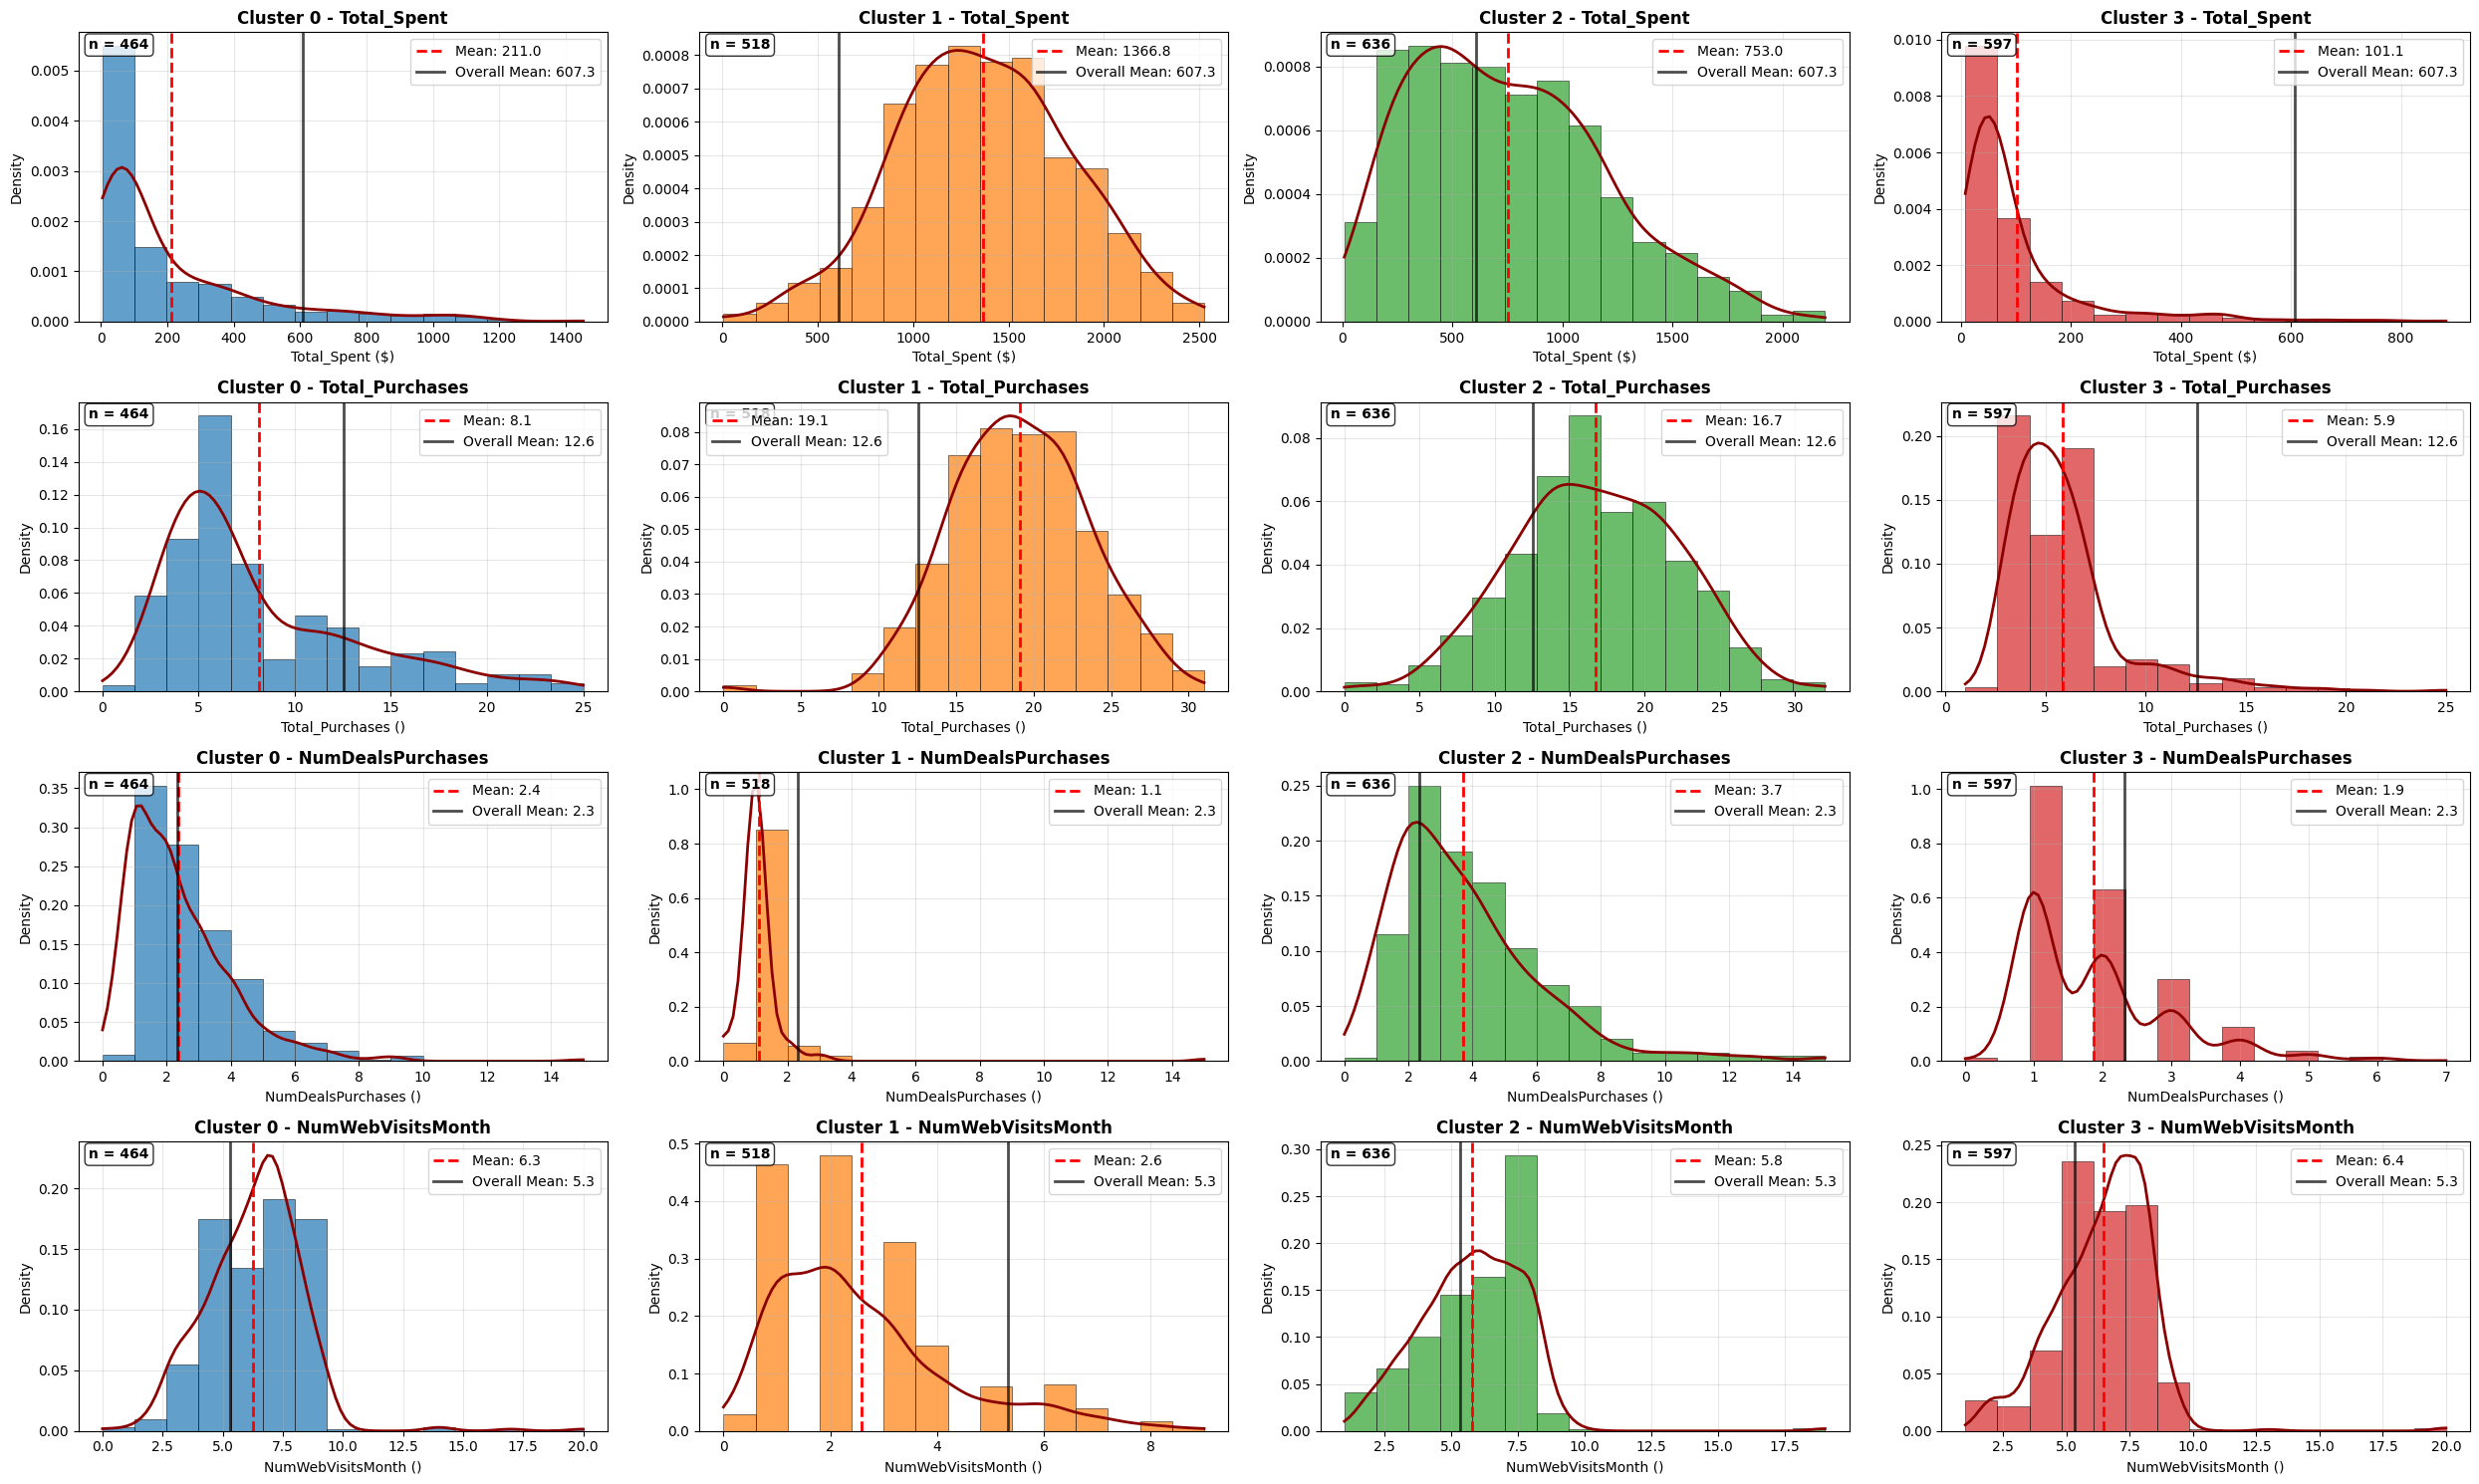

In [0]:

# Define colors for each cluster
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
features = ['Total_Spent', 'Total_Purchases', 'NumDealsPurchases', 'NumWebVisitsMonth']
feature_titles = ['Income Distribution', 'Age Distribution']
feature_units = ['($)', '()', '()', '()' ]

fig, axes = plt.subplots(4, 4, figsize=(25, 15))

# Create distribution plots for each feature and cluster
for row, feature in enumerate(features):
    for col, cluster_num in enumerate(range(4)):
        # Get data for this cluster and feature
        cluster_data = df_segmented[df_segmented['Cluster'] == cluster_num][feature]
        
        # Create histogram with density curve
        axes[row, col].hist(cluster_data, bins=15, alpha=0.7, color=cluster_colors[col], 
                           density=True, edgecolor='black', linewidth=0.5)
        
        # Add density curve
        import numpy as np
        from scipy.stats import gaussian_kde
        if len(cluster_data) > 1:  
            kde = gaussian_kde(cluster_data)
            x_range = np.linspace(cluster_data.min(), cluster_data.max(), 100)
            axes[row, col].plot(x_range, kde(x_range), color='darkred', linewidth=2)
        
        # Add vertical line for mean
        mean_val = cluster_data.mean()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                              label=f'Mean: {mean_val:.1f}')
        
        # Add overall average line for comparison
        overall_mean = df_segmented[feature].mean()
        axes[row, col].axvline(overall_mean, color='black', linestyle='-', linewidth=2, 
                              alpha=0.7, label=f'Overall Mean: {overall_mean:.1f}')
        
        axes[row, col].set_title(f'Cluster {cluster_num} - {feature}', fontweight='bold')
        axes[row, col].set_xlabel(f'{feature} {feature_units[row]}')
        axes[row, col].set_ylabel('Density')
        axes[row, col].legend()
        axes[row, col].grid(alpha=0.3)
        
        n_samples = len(cluster_data)
        axes[row, col].text(0.02, 0.98, f'n = {n_samples}', transform=axes[row, col].transAxes, 
                           verticalalignment='top', fontweight='bold', 
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

PRODUCT PREFERENCE FEATURES ANALYSIS

1. PRODUCT PREFERENCE DISTRIBUTION BY CLUSTER


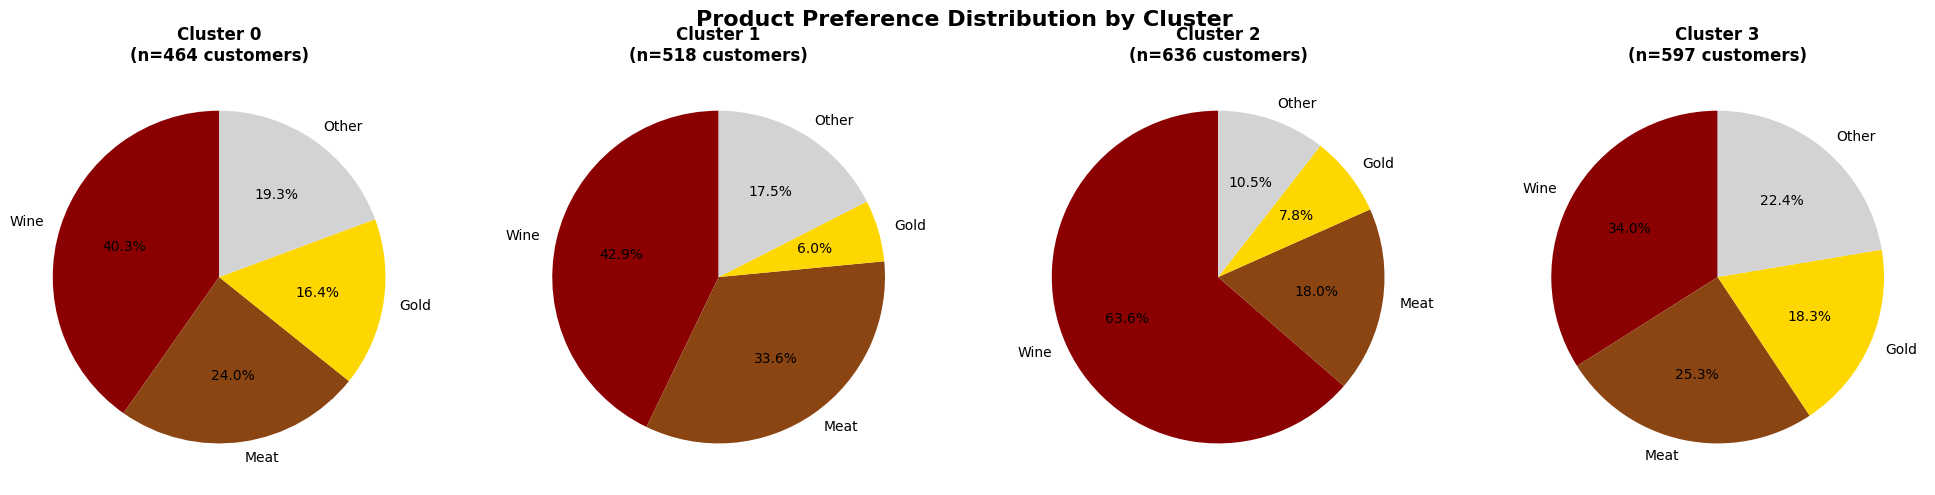


2. DETAILED PRODUCT PREFERENCE SUMMARY BY CLUSTER
   Cluster  Wine_Ratio  Meat_Ratio  Gold_Ratio  Other_Ratio  Total_Customers
0        0      0.4025      0.2399      0.1640       0.1935              464
1        1      0.4286      0.3365      0.0599       0.1750              518
2        2      0.6363      0.1803      0.0781       0.1053              636
3        3      0.3398      0.2535      0.1831       0.2236              597

Overall Averages:
Wine: 0.4588 (45.9%)
Meat: 0.2491 (24.9%)
Gold: 0.1201 (12.0%)
Other: 0.1720 (17.2%)

3. KEY INSIGHTS:
----------------------------------------
• Cluster 0: Wine preference dominates (0.4%)
• Cluster 1: Wine preference dominates (0.4%)
• Cluster 2: Wine preference dominates (0.6%)
• Cluster 3: Wine preference dominates (0.3%)

4. COMPARISON TO OVERALL AVERAGES:
-----------------------------------
Cluster 0: Wine -12.3%, Meat -3.7%, Gold +36.5%
Cluster 1: Wine -6.6%, Meat +35.1%, Gold -50.2%
Cluster 2: Wine +38.7%, Meat -27.6%, Gold -35.0%


In [0]:
# Product Preference Features (Ratios) 
print("PRODUCT PREFERENCE FEATURES ANALYSIS")
print("="*50)

print("\n1. PRODUCT PREFERENCE DISTRIBUTION BY CLUSTER")
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Product Preference Distribution by Cluster', fontsize=16, fontweight='bold')

colors = ['#8B0000', '#8B4513', '#FFD700', '#D3D3D3']  

for cluster in range(4):
    cluster_data = df_segmented[df_segmented['Cluster'] == cluster]
    
    # Calculate average ratios for this cluster
    wine_ratio = cluster_data['Wine_Ratio'].mean()
    meat_ratio = cluster_data['Meat_Ratio'].mean()
    gold_ratio = cluster_data['Gold_Ratio'].mean()
    other_ratio = 1 - (wine_ratio + meat_ratio + gold_ratio)
    
    # Data for pie chart
    ratios = [wine_ratio, meat_ratio, gold_ratio, other_ratio]
    labels = ['Wine', 'Meat', 'Gold', 'Other']
    
    # Only show labels for segments that are significant (>5%)
    filtered_labels = [label if ratio > 0.05 else '' for label, ratio in zip(labels, ratios)]
    
    axes[cluster].pie(ratios, labels=filtered_labels, autopct='%1.1f%%', 
                     startangle=90, colors=colors)
    axes[cluster].set_title(f'Cluster {cluster}\n(n={len(cluster_data)} customers)', 
                           fontweight='bold')

plt.tight_layout()
plt.show()


print("\n2. DETAILED PRODUCT PREFERENCE SUMMARY BY CLUSTER")
print("="*60)

# Create a detailed summary table
preference_details = []
for cluster in range(4):
    cluster_data = df_segmented[df_segmented['Cluster'] == cluster]
    
    wine_avg = cluster_data['Wine_Ratio'].mean()
    meat_avg = cluster_data['Meat_Ratio'].mean()
    gold_avg = cluster_data['Gold_Ratio'].mean()
    other_avg = 1 - (wine_avg + meat_avg + gold_avg)
    
    preference_details.append({
        'Cluster': cluster,
        'Wine_Ratio': wine_avg,
        'Meat_Ratio': meat_avg,
        'Gold_Ratio': gold_avg,
        'Other_Ratio': other_avg,
        'Total_Customers': len(cluster_data)
    })

preference_df = pd.DataFrame(preference_details)
print(preference_df.round(4))

# Overall averages
overall_wine = df_segmented['Wine_Ratio'].mean()
overall_meat = df_segmented['Meat_Ratio'].mean()
overall_gold = df_segmented['Gold_Ratio'].mean()
overall_other = 1 - (overall_wine + overall_meat + overall_gold)

print(f"\nOverall Averages:")
print(f"Wine: {overall_wine:.4f} ({overall_wine*100:.1f}%)")
print(f"Meat: {overall_meat:.4f} ({overall_meat*100:.1f}%)")
print(f"Gold: {overall_gold:.4f} ({overall_gold*100:.1f}%)")
print(f"Other: {overall_other:.4f} ({overall_other*100:.1f}%)")

print(f"\n3. KEY INSIGHTS:")
print("-" * 40)

for cluster in range(4):
    cluster_data = preference_df[preference_df['Cluster'] == cluster].iloc[0]
    
    # Find dominant preference
    preferences = {
        'Wine': cluster_data['Wine_Ratio'],
        'Meat': cluster_data['Meat_Ratio'], 
        'Gold': cluster_data['Gold_Ratio'],
        'Other': cluster_data['Other_Ratio']
    }
    dominant = max(preferences, key=preferences.get)
    
    print(f"• Cluster {cluster}: {dominant} preference dominates ({preferences[dominant]:.1f}%)")

print(f"\n4. COMPARISON TO OVERALL AVERAGES:")
print("-" * 35)

for cluster in range(4):
    cluster_data = preference_df[preference_df['Cluster'] == cluster].iloc[0]
    
    wine_diff = (cluster_data['Wine_Ratio'] - overall_wine) / overall_wine * 100
    meat_diff = (cluster_data['Meat_Ratio'] - overall_meat) / overall_meat * 100
    gold_diff = (cluster_data['Gold_Ratio'] - overall_gold) / overall_gold * 100
    
    print(f"Cluster {cluster}: Wine {wine_diff:+.1f}%, Meat {meat_diff:+.1f}%, Gold {gold_diff:+.1f}%")

CHANNEL PREFERENCE FEATURES ANALYSIS

1. CHANNEL PREFERENCE DISTRIBUTION BY CLUSTER


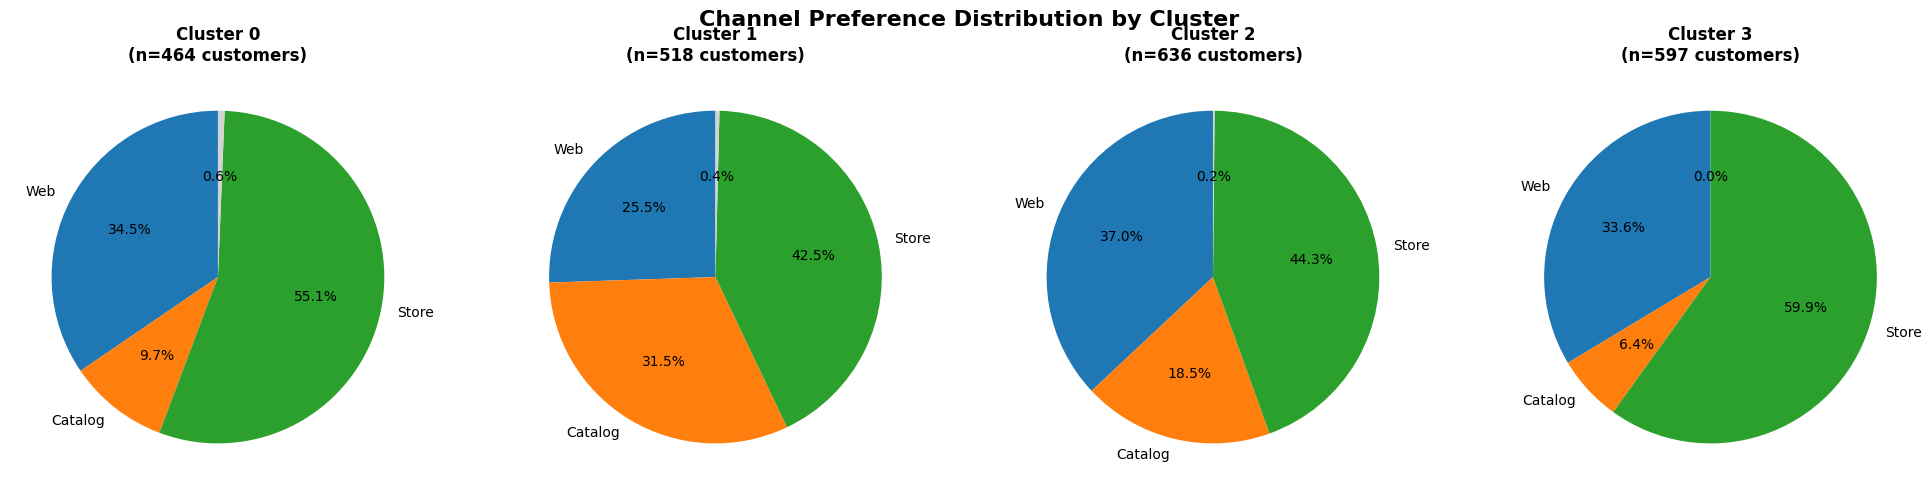


2. DETAILED CHANNEL PREFERENCE SUMMARY BY CLUSTER
   Cluster  Web_Ratio  Catalog_Ratio  Store_Ratio  Other_Ratio  Total_Customers
0        0     0.3453         0.0975       0.5508       0.0065              464
1        1     0.2553         0.3155       0.4254       0.0039              518
2        2     0.3699         0.1854       0.4432       0.0016              636
3        3     0.3362         0.0645       0.5993       0.0000              597

Overall Averages:
Web: 0.3289 (32.9%)
Catalog: 0.1648 (16.5%)
Store: 0.5036 (50.4%)
Other: 0.0027 (0.3%)

3. KEY INSIGHTS:
----------------------------------------
• Cluster 0: Store channel preference dominates (0.6%)
• Cluster 1: Store channel preference dominates (0.4%)
• Cluster 2: Store channel preference dominates (0.4%)
• Cluster 3: Store channel preference dominates (0.6%)

4. COMPARISON TO OVERALL AVERAGES:
-----------------------------------
Cluster 0: Web +5.0%, Catalog -40.9%, Store +9.4%
Cluster 1: Web -22.4%, Catalog +91.4%, Sto

In [0]:
# Channel Preference Features (Ratios) 
print("CHANNEL PREFERENCE FEATURES ANALYSIS")
print("="*50)

print("\n1. CHANNEL PREFERENCE DISTRIBUTION BY CLUSTER")
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Channel Preference Distribution by Cluster', fontsize=16, fontweight='bold')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d3d3d3'] 

for cluster in range(4):
    cluster_data = df_segmented[df_segmented['Cluster'] == cluster]
    
    # Calculate average ratios for this cluster
    web_ratio = cluster_data['Web_Purchase_Ratio'].mean()
    catalog_ratio = cluster_data['Catalog_Purchase_Ratio'].mean()
    store_ratio = cluster_data['Store_Purchase_Ratio'].mean()
    other_ratio = 1 - (web_ratio + catalog_ratio + store_ratio)
    
    # Data for pie chart
    ratios = [web_ratio, catalog_ratio, store_ratio, other_ratio]
    labels = ['Web', 'Catalog', 'Store', 'Other']
    
    # Only show labels for segments that are significant (>5%)
    filtered_labels = [label if ratio > 0.05 else '' for label, ratio in zip(labels, ratios)]
    
    axes[cluster].pie(ratios, labels=filtered_labels, autopct='%1.1f%%', 
                     startangle=90, colors=colors)
    axes[cluster].set_title(f'Cluster {cluster}\n(n={len(cluster_data)} customers)', 
                           fontweight='bold')

plt.tight_layout()
plt.show()

print("\n2. DETAILED CHANNEL PREFERENCE SUMMARY BY CLUSTER")
print("="*60)

# Create a detailed summary table
preference_details = []
for cluster in range(4):
    cluster_data = df_segmented[df_segmented['Cluster'] == cluster]
    
    web_avg = cluster_data['Web_Purchase_Ratio'].mean()
    catalog_avg = cluster_data['Catalog_Purchase_Ratio'].mean()
    store_avg = cluster_data['Store_Purchase_Ratio'].mean()
    other_avg = 1 - (web_avg + catalog_avg + store_avg)
    
    preference_details.append({
        'Cluster': cluster,
        'Web_Ratio': web_avg,
        'Catalog_Ratio': catalog_avg,
        'Store_Ratio': store_avg,
        'Other_Ratio': other_avg,
        'Total_Customers': len(cluster_data)
    })

preference_df = pd.DataFrame(preference_details)
print(preference_df.round(4))

# Overall averages
overall_web = df_segmented['Web_Purchase_Ratio'].mean()
overall_catalog = df_segmented['Catalog_Purchase_Ratio'].mean()
overall_store = df_segmented['Store_Purchase_Ratio'].mean()
overall_other = 1 - (overall_web + overall_catalog + overall_store)

print(f"\nOverall Averages:")
print(f"Web: {overall_web:.4f} ({overall_web*100:.1f}%)")
print(f"Catalog: {overall_catalog:.4f} ({overall_catalog*100:.1f}%)")
print(f"Store: {overall_store:.4f} ({overall_store*100:.1f}%)")
print(f"Other: {overall_other:.4f} ({overall_other*100:.1f}%)")

print(f"\n3. KEY INSIGHTS:")
print("-" * 40)

for cluster in range(4):
    cluster_data = preference_df[preference_df['Cluster'] == cluster].iloc[0]
    
    # Find dominant preference
    preferences = {
        'Web': cluster_data['Web_Ratio'],
        'Catalog': cluster_data['Catalog_Ratio'], 
        'Store': cluster_data['Store_Ratio'],
        'Other': cluster_data['Other_Ratio']
    }
    dominant = max(preferences, key=preferences.get)
    
    print(f"• Cluster {cluster}: {dominant} channel preference dominates ({preferences[dominant]:.1f}%)")

print(f"\n4. COMPARISON TO OVERALL AVERAGES:")
print("-" * 35)

for cluster in range(4):
    cluster_data = preference_df[preference_df['Cluster'] == cluster].iloc[0]
    
    web_diff = (cluster_data['Web_Ratio'] - overall_web) / overall_web * 100
    catalog_diff = (cluster_data['Catalog_Ratio'] - overall_catalog) / overall_catalog * 100
    store_diff = (cluster_data['Store_Ratio'] - overall_store) / overall_store * 100
    
    print(f"Cluster {cluster}: Web {web_diff:+.1f}%, Catalog {catalog_diff:+.1f}%, Store {store_diff:+.1f}%")

In [0]:
cluster_summary = pd.DataFrame({
    'Segment_Size': df_segmented['Cluster'].value_counts().sort_index(),
    'Avg_Income': cluster_profile['Income'].round(0),
    'Avg_Total_Spent': cluster_profile['Total_Spent'].round(0),
    'Avg_Total_Purchases': cluster_profile['Total_Purchases'].round(1),
    'Avg_Age': cluster_profile['Age'].round(1),
    'Avg_Family_Size': cluster_profile['Family_Size'].round(1),
    'Wine_Preference': cluster_profile['Wine_Ratio'].round(2),
    'Preferred_Channel': ['Store', 'Catalog', 'Balanced', 'Store']  # Based on your ratios
})

print("Cluster Profile Summary:")
print("="*80)
display(cluster_summary)

Cluster Profile Summary:
   Segment_Size  Avg_Income  ...  Wine_Preference  Preferred_Channel
0           464        -1.0  ...            -0.25              Store
1           518         1.0  ...            -0.13            Catalog
2           636         0.0  ...             0.78           Balanced
3           597        -1.0  ...            -0.52              Store

[4 rows x 8 columns]
